In [1]:
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('data.csv')
data

,Density_burst,Density_throttling,Quality
0,2.575873e+07,1.585146e+06,2160
1,2.093498e+07,1.511580e+06,2160
2,2.473638e+07,2.061731e+06,2160
3,1.771628e+07,2.028604e+06,2160
4,9.715531e+06,8.426243e+05,2160
...,...,...,...
145,2.209689e+06,3.304367e+04,360
146,2.285067e+06,3.488049e+04,360
147,1.595180e+06,2.678645e+04,360
148,2.364400e+06,3.232247e+04,360


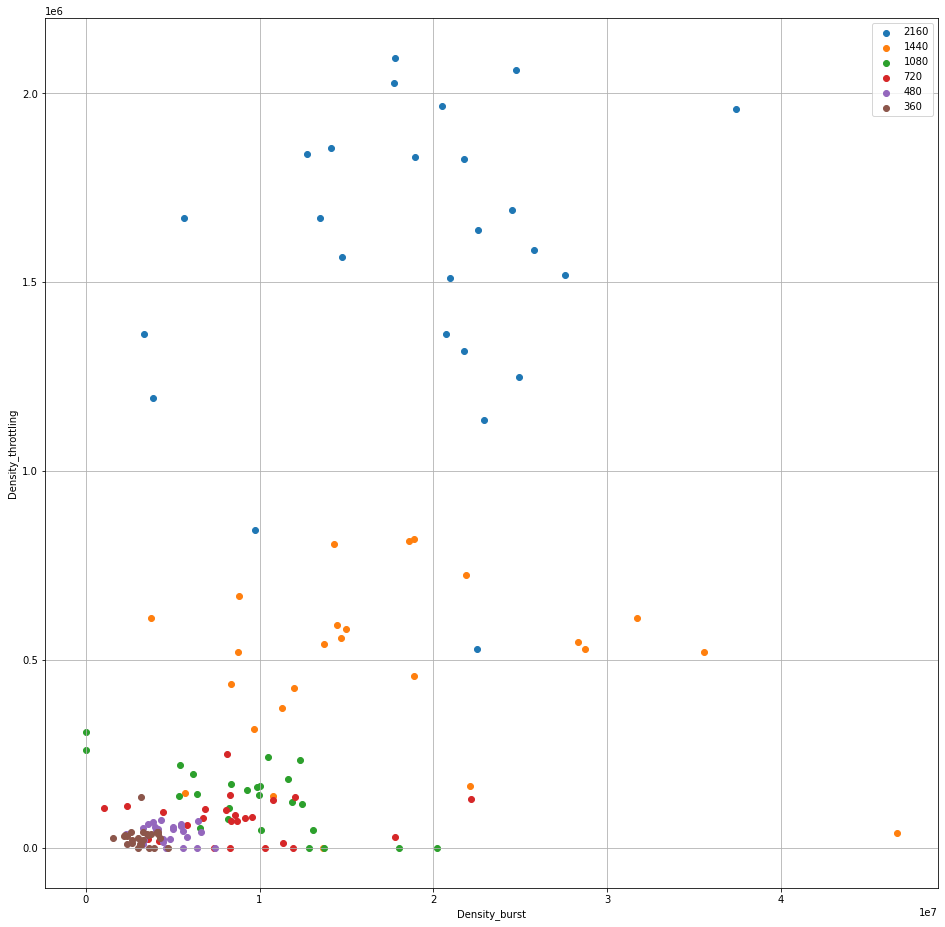

In [3]:
# Посмотрим на данные

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(16)

for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    for i in range(len(data)):
        if data['Quality'][i] == quality:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
    plt.scatter(x, y, label=quality)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

In [4]:
data_shuffled = shuffle(data)
data_shuffled

,Density_burst,Density_throttling,Quality
122,2.317869e+06,3.897658e+04,480
20,1.349526e+07,1.670118e+06,2160
149,3.187846e+06,1.355752e+05,360
85,8.113056e+06,2.494330e+05,720
27,2.207857e+07,1.651673e+05,1440
...,...,...,...
63,1.230614e+07,2.345043e+05,1080
113,3.585624e+06,6.539965e+04,480
29,5.707551e+06,1.454073e+05,1440
88,2.213642e+07,1.319932e+05,720


In [5]:
# Пробуем обычный KNN

X = data_shuffled[['Density_burst', 'Density_throttling']]
y = data_shuffled['Quality']
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
    n_spaces = 1 - i // 10
    print(i, ' ' * n_spaces, scores.mean())

1   0.5333333333333334
2   0.49333333333333335
3   0.48666666666666664
4   0.45999999999999996
5   0.47333333333333333
6   0.5
7   0.47333333333333333
8   0.4666666666666667
9   0.5
10  0.48
11  0.4666666666666667
12  0.4533333333333333
13  0.48
14  0.47333333333333333
15  0.4666666666666667
16  0.44666666666666666
17  0.44000000000000006
18  0.44666666666666666
19  0.4666666666666667
20  0.48
21  0.4666666666666667
22  0.47333333333333333
23  0.48666666666666664
24  0.48666666666666664
25  0.4866666666666667
26  0.49333333333333335
27  0.49333333333333335
28  0.5000000000000001
29  0.4866666666666667


In [6]:
# Лучшее значение -- 0.533 для n = 1

In [7]:
# Нужно нормализовать данные

data_norm = data_shuffled.copy()

for column in ['Density_burst', 'Density_throttling']:
    data_norm[column] = ((data_norm[column] - data_norm[column].min()) /
                            (data_norm[column].max() - data_norm[column].min()))
    
data_norm

,Density_burst,Density_throttling,Quality
122,0.049649,0.018605,480
20,0.289084,0.797249,2160
149,0.068285,0.064717,360
85,0.173790,0.119068,720
27,0.472950,0.078843,1440
...,...,...,...
63,0.263611,0.111942,1080
113,0.076806,0.031218,480
29,0.122261,0.069410,1440
88,0.474189,0.063007,720


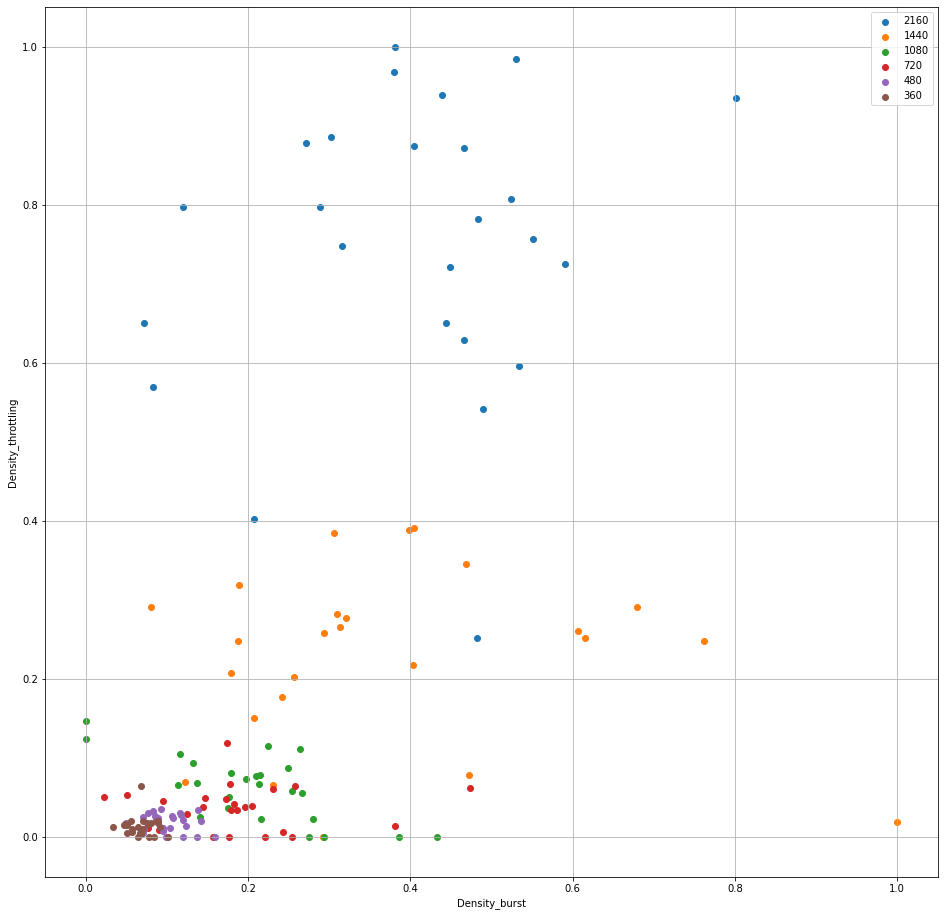

In [8]:
# Строим график ещё раз, теперь с нормализованными данными

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(16)

for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    for i in range(len(data_norm)):
        if data['Quality'][i] == quality:
            x.append(data_norm['Density_burst'][i])
            y.append(data_norm['Density_throttling'][i])
    plt.scatter(x, y, label=quality)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

In [9]:
# Не то чтобы много поменялось, но это поможет нам для дальнейшей работы с классификаторами

In [10]:
# Пробуем KNN, но теперь с нормализованными данными

X = data_norm[['Density_burst', 'Density_throttling']]
y = data_norm['Quality']
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
    n_spaces = 1 - i // 10
    print(i, ' ' * n_spaces, scores.mean())

1   0.6666666666666666
2   0.6866666666666668
3   0.7
4   0.7066666666666667
5   0.6866666666666668
6   0.6866666666666666
7   0.7
8   0.6866666666666666
9   0.7066666666666667
10  0.6866666666666666
11  0.7066666666666668
12  0.6799999999999999
13  0.6933333333333335
14  0.6466666666666667
15  0.6466666666666667
16  0.6533333333333333
17  0.6666666666666667
18  0.6466666666666667
19  0.6666666666666667
20  0.6600000000000001
21  0.6866666666666668
22  0.6533333333333334
23  0.6466666666666666
24  0.6533333333333333
25  0.6399999999999999
26  0.6533333333333333
27  0.6666666666666666
28  0.6466666666666666
29  0.6399999999999999


In [11]:
# Точность улучшилась -- теперь это 0.706 для n = 4 и других

In [12]:
# Пробуем CatBoost

model = CatBoostClassifier(iterations = 2000)
scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')

Learning rate set to 0.039774
0:	learn: 1.7466650	total: 48.9ms	remaining: 1m 37s
1:	learn: 1.7093251	total: 50.7ms	remaining: 50.6s
2:	learn: 1.6810204	total: 52.3ms	remaining: 34.8s
3:	learn: 1.6513846	total: 53.5ms	remaining: 26.7s
4:	learn: 1.6151980	total: 54.5ms	remaining: 21.7s
5:	learn: 1.5787578	total: 55.5ms	remaining: 18.4s
6:	learn: 1.5527192	total: 56.5ms	remaining: 16.1s
7:	learn: 1.5252557	total: 58ms	remaining: 14.4s
8:	learn: 1.5010296	total: 59.3ms	remaining: 13.1s
9:	learn: 1.4789266	total: 60.4ms	remaining: 12s
10:	learn: 1.4468844	total: 61.7ms	remaining: 11.2s
11:	learn: 1.4283592	total: 62.7ms	remaining: 10.4s
12:	learn: 1.4012838	total: 63.8ms	remaining: 9.75s
13:	learn: 1.3744936	total: 64.8ms	remaining: 9.19s
14:	learn: 1.3525377	total: 65.8ms	remaining: 8.7s
15:	learn: 1.3255664	total: 66.8ms	remaining: 8.28s
16:	learn: 1.3047115	total: 67.8ms	remaining: 7.91s
17:	learn: 1.2827559	total: 68.8ms	remaining: 7.58s
18:	learn: 1.2604487	total: 69.8ms	remaining: 7.

176:	learn: 0.4662129	total: 244ms	remaining: 2.51s
177:	learn: 0.4650082	total: 245ms	remaining: 2.5s
178:	learn: 0.4632205	total: 246ms	remaining: 2.5s
179:	learn: 0.4620644	total: 247ms	remaining: 2.49s
180:	learn: 0.4604312	total: 248ms	remaining: 2.49s
181:	learn: 0.4583036	total: 249ms	remaining: 2.48s
182:	learn: 0.4569829	total: 250ms	remaining: 2.48s
183:	learn: 0.4544766	total: 251ms	remaining: 2.47s
184:	learn: 0.4530099	total: 252ms	remaining: 2.47s
185:	learn: 0.4516514	total: 253ms	remaining: 2.46s
186:	learn: 0.4502522	total: 254ms	remaining: 2.46s
187:	learn: 0.4486238	total: 255ms	remaining: 2.45s
188:	learn: 0.4468722	total: 255ms	remaining: 2.45s
189:	learn: 0.4456078	total: 256ms	remaining: 2.44s
190:	learn: 0.4437622	total: 257ms	remaining: 2.44s
191:	learn: 0.4416809	total: 259ms	remaining: 2.43s
192:	learn: 0.4405021	total: 259ms	remaining: 2.43s
193:	learn: 0.4391988	total: 260ms	remaining: 2.42s
194:	learn: 0.4376997	total: 261ms	remaining: 2.42s
195:	learn: 0.

364:	learn: 0.2762774	total: 433ms	remaining: 1.94s
365:	learn: 0.2755625	total: 435ms	remaining: 1.94s
366:	learn: 0.2747930	total: 437ms	remaining: 1.94s
367:	learn: 0.2742752	total: 438ms	remaining: 1.94s
368:	learn: 0.2735842	total: 439ms	remaining: 1.94s
369:	learn: 0.2730398	total: 440ms	remaining: 1.94s
370:	learn: 0.2723810	total: 441ms	remaining: 1.94s
371:	learn: 0.2719722	total: 442ms	remaining: 1.93s
372:	learn: 0.2713738	total: 443ms	remaining: 1.93s
373:	learn: 0.2708779	total: 444ms	remaining: 1.93s
374:	learn: 0.2701521	total: 445ms	remaining: 1.93s
375:	learn: 0.2696498	total: 446ms	remaining: 1.93s
376:	learn: 0.2689507	total: 447ms	remaining: 1.93s
377:	learn: 0.2682902	total: 449ms	remaining: 1.92s
378:	learn: 0.2678075	total: 450ms	remaining: 1.92s
379:	learn: 0.2672029	total: 451ms	remaining: 1.92s
380:	learn: 0.2667043	total: 452ms	remaining: 1.92s
381:	learn: 0.2662285	total: 453ms	remaining: 1.92s
382:	learn: 0.2655266	total: 454ms	remaining: 1.92s
383:	learn: 

546:	learn: 0.1952623	total: 622ms	remaining: 1.65s
547:	learn: 0.1948486	total: 623ms	remaining: 1.65s
548:	learn: 0.1944636	total: 624ms	remaining: 1.65s
549:	learn: 0.1941486	total: 625ms	remaining: 1.65s
550:	learn: 0.1935673	total: 626ms	remaining: 1.65s
551:	learn: 0.1931397	total: 627ms	remaining: 1.64s
552:	learn: 0.1928084	total: 628ms	remaining: 1.64s
553:	learn: 0.1924572	total: 629ms	remaining: 1.64s
554:	learn: 0.1921233	total: 630ms	remaining: 1.64s
555:	learn: 0.1918714	total: 631ms	remaining: 1.64s
556:	learn: 0.1914851	total: 632ms	remaining: 1.64s
557:	learn: 0.1911152	total: 633ms	remaining: 1.64s
558:	learn: 0.1908297	total: 636ms	remaining: 1.64s
559:	learn: 0.1904219	total: 637ms	remaining: 1.64s
560:	learn: 0.1901557	total: 638ms	remaining: 1.64s
561:	learn: 0.1896213	total: 639ms	remaining: 1.64s
562:	learn: 0.1892440	total: 640ms	remaining: 1.63s
563:	learn: 0.1889784	total: 641ms	remaining: 1.63s
564:	learn: 0.1885233	total: 642ms	remaining: 1.63s
565:	learn: 

734:	learn: 0.1472854	total: 811ms	remaining: 1.4s
735:	learn: 0.1470416	total: 812ms	remaining: 1.4s
736:	learn: 0.1469083	total: 813ms	remaining: 1.39s
737:	learn: 0.1467354	total: 815ms	remaining: 1.39s
738:	learn: 0.1466138	total: 816ms	remaining: 1.39s
739:	learn: 0.1464280	total: 817ms	remaining: 1.39s
740:	learn: 0.1461523	total: 818ms	remaining: 1.39s
741:	learn: 0.1459133	total: 819ms	remaining: 1.39s
742:	learn: 0.1456480	total: 820ms	remaining: 1.39s
743:	learn: 0.1453674	total: 821ms	remaining: 1.39s
744:	learn: 0.1452436	total: 822ms	remaining: 1.38s
745:	learn: 0.1450992	total: 823ms	remaining: 1.38s
746:	learn: 0.1449454	total: 824ms	remaining: 1.38s
747:	learn: 0.1448177	total: 825ms	remaining: 1.38s
748:	learn: 0.1446413	total: 826ms	remaining: 1.38s
749:	learn: 0.1444104	total: 827ms	remaining: 1.38s
750:	learn: 0.1440902	total: 828ms	remaining: 1.38s
751:	learn: 0.1438429	total: 829ms	remaining: 1.38s
752:	learn: 0.1436245	total: 830ms	remaining: 1.37s
753:	learn: 0.

923:	learn: 0.1153906	total: 1s	remaining: 1.17s
924:	learn: 0.1152103	total: 1s	remaining: 1.16s
925:	learn: 0.1150633	total: 1s	remaining: 1.16s
926:	learn: 0.1149771	total: 1s	remaining: 1.16s
927:	learn: 0.1148423	total: 1s	remaining: 1.16s
928:	learn: 0.1146924	total: 1.01s	remaining: 1.16s
929:	learn: 0.1145690	total: 1.01s	remaining: 1.16s
930:	learn: 0.1144505	total: 1.01s	remaining: 1.16s
931:	learn: 0.1143239	total: 1.01s	remaining: 1.16s
932:	learn: 0.1142195	total: 1.01s	remaining: 1.16s
933:	learn: 0.1141054	total: 1.01s	remaining: 1.16s
934:	learn: 0.1139175	total: 1.01s	remaining: 1.15s
935:	learn: 0.1137832	total: 1.01s	remaining: 1.15s
936:	learn: 0.1136730	total: 1.01s	remaining: 1.15s
937:	learn: 0.1135461	total: 1.02s	remaining: 1.15s
938:	learn: 0.1133952	total: 1.02s	remaining: 1.15s
939:	learn: 0.1132448	total: 1.02s	remaining: 1.15s
940:	learn: 0.1131150	total: 1.02s	remaining: 1.15s
941:	learn: 0.1129977	total: 1.02s	remaining: 1.15s
942:	learn: 0.1128479	total

1107:	learn: 0.0938756	total: 1.19s	remaining: 958ms
1108:	learn: 0.0937616	total: 1.19s	remaining: 957ms
1109:	learn: 0.0936435	total: 1.19s	remaining: 956ms
1110:	learn: 0.0935285	total: 1.19s	remaining: 955ms
1111:	learn: 0.0934445	total: 1.19s	remaining: 954ms
1112:	learn: 0.0933710	total: 1.2s	remaining: 953ms
1113:	learn: 0.0932595	total: 1.2s	remaining: 952ms
1114:	learn: 0.0931397	total: 1.2s	remaining: 951ms
1115:	learn: 0.0930457	total: 1.2s	remaining: 950ms
1116:	learn: 0.0929443	total: 1.2s	remaining: 948ms
1117:	learn: 0.0928606	total: 1.2s	remaining: 947ms
1118:	learn: 0.0928145	total: 1.2s	remaining: 946ms
1119:	learn: 0.0926806	total: 1.2s	remaining: 945ms
1120:	learn: 0.0925932	total: 1.2s	remaining: 944ms
1121:	learn: 0.0925148	total: 1.21s	remaining: 943ms
1122:	learn: 0.0924143	total: 1.21s	remaining: 942ms
1123:	learn: 0.0923490	total: 1.21s	remaining: 941ms
1124:	learn: 0.0922971	total: 1.21s	remaining: 940ms
1125:	learn: 0.0922495	total: 1.21s	remaining: 938ms
11

1294:	learn: 0.0787745	total: 1.38s	remaining: 750ms
1295:	learn: 0.0786784	total: 1.38s	remaining: 749ms
1296:	learn: 0.0786188	total: 1.38s	remaining: 748ms
1297:	learn: 0.0785552	total: 1.38s	remaining: 747ms
1298:	learn: 0.0784955	total: 1.38s	remaining: 746ms
1299:	learn: 0.0784376	total: 1.38s	remaining: 745ms
1300:	learn: 0.0783788	total: 1.38s	remaining: 744ms
1301:	learn: 0.0783330	total: 1.39s	remaining: 743ms
1302:	learn: 0.0782248	total: 1.39s	remaining: 742ms
1303:	learn: 0.0781381	total: 1.39s	remaining: 741ms
1304:	learn: 0.0780898	total: 1.39s	remaining: 740ms
1305:	learn: 0.0780277	total: 1.39s	remaining: 739ms
1306:	learn: 0.0779467	total: 1.39s	remaining: 737ms
1307:	learn: 0.0778808	total: 1.39s	remaining: 736ms
1308:	learn: 0.0778345	total: 1.39s	remaining: 735ms
1309:	learn: 0.0777837	total: 1.39s	remaining: 734ms
1310:	learn: 0.0777105	total: 1.4s	remaining: 733ms
1311:	learn: 0.0776043	total: 1.4s	remaining: 732ms
1312:	learn: 0.0775529	total: 1.4s	remaining: 73

1481:	learn: 0.0671055	total: 1.57s	remaining: 548ms
1482:	learn: 0.0670776	total: 1.57s	remaining: 547ms
1483:	learn: 0.0670079	total: 1.57s	remaining: 546ms
1484:	learn: 0.0669618	total: 1.57s	remaining: 544ms
1485:	learn: 0.0668772	total: 1.57s	remaining: 543ms
1486:	learn: 0.0668435	total: 1.57s	remaining: 542ms
1487:	learn: 0.0667927	total: 1.57s	remaining: 541ms
1488:	learn: 0.0667214	total: 1.57s	remaining: 540ms
1489:	learn: 0.0666662	total: 1.57s	remaining: 539ms
1490:	learn: 0.0666252	total: 1.58s	remaining: 538ms
1491:	learn: 0.0665316	total: 1.58s	remaining: 537ms
1492:	learn: 0.0664680	total: 1.58s	remaining: 536ms
1493:	learn: 0.0664384	total: 1.58s	remaining: 535ms
1494:	learn: 0.0663795	total: 1.58s	remaining: 534ms
1495:	learn: 0.0663261	total: 1.58s	remaining: 533ms
1496:	learn: 0.0662653	total: 1.58s	remaining: 532ms
1497:	learn: 0.0662081	total: 1.58s	remaining: 531ms
1498:	learn: 0.0661562	total: 1.58s	remaining: 530ms
1499:	learn: 0.0661288	total: 1.58s	remaining:

1669:	learn: 0.0581480	total: 1.76s	remaining: 347ms
1670:	learn: 0.0581037	total: 1.76s	remaining: 346ms
1671:	learn: 0.0580716	total: 1.76s	remaining: 345ms
1672:	learn: 0.0580342	total: 1.76s	remaining: 344ms
1673:	learn: 0.0579801	total: 1.76s	remaining: 343ms
1674:	learn: 0.0579125	total: 1.76s	remaining: 342ms
1675:	learn: 0.0578801	total: 1.76s	remaining: 341ms
1676:	learn: 0.0578500	total: 1.76s	remaining: 340ms
1677:	learn: 0.0578204	total: 1.76s	remaining: 339ms
1678:	learn: 0.0577770	total: 1.77s	remaining: 338ms
1679:	learn: 0.0577317	total: 1.77s	remaining: 337ms
1680:	learn: 0.0577107	total: 1.77s	remaining: 336ms
1681:	learn: 0.0576553	total: 1.77s	remaining: 335ms
1682:	learn: 0.0576146	total: 1.77s	remaining: 334ms
1683:	learn: 0.0575608	total: 1.77s	remaining: 333ms
1684:	learn: 0.0575209	total: 1.77s	remaining: 331ms
1685:	learn: 0.0574889	total: 1.77s	remaining: 330ms
1686:	learn: 0.0574271	total: 1.77s	remaining: 329ms
1687:	learn: 0.0573879	total: 1.78s	remaining:

1861:	learn: 0.0509041	total: 1.95s	remaining: 144ms
1862:	learn: 0.0508795	total: 1.95s	remaining: 143ms
1863:	learn: 0.0508530	total: 1.95s	remaining: 142ms
1864:	learn: 0.0508214	total: 1.95s	remaining: 141ms
1865:	learn: 0.0507959	total: 1.95s	remaining: 140ms
1866:	learn: 0.0507698	total: 1.95s	remaining: 139ms
1867:	learn: 0.0507355	total: 1.95s	remaining: 138ms
1868:	learn: 0.0506870	total: 1.95s	remaining: 137ms
1869:	learn: 0.0506549	total: 1.95s	remaining: 136ms
1870:	learn: 0.0506368	total: 1.96s	remaining: 135ms
1871:	learn: 0.0506042	total: 1.96s	remaining: 134ms
1872:	learn: 0.0505697	total: 1.96s	remaining: 133ms
1873:	learn: 0.0505448	total: 1.96s	remaining: 132ms
1874:	learn: 0.0504966	total: 1.96s	remaining: 131ms
1875:	learn: 0.0504680	total: 1.96s	remaining: 130ms
1876:	learn: 0.0504383	total: 1.96s	remaining: 129ms
1877:	learn: 0.0503956	total: 1.96s	remaining: 127ms
1878:	learn: 0.0503713	total: 1.96s	remaining: 126ms
1879:	learn: 0.0503507	total: 1.96s	remaining:

191:	learn: 0.4880065	total: 191ms	remaining: 1.79s
192:	learn: 0.4865461	total: 192ms	remaining: 1.79s
193:	learn: 0.4848062	total: 193ms	remaining: 1.79s
194:	learn: 0.4830540	total: 194ms	remaining: 1.79s
195:	learn: 0.4821742	total: 195ms	remaining: 1.79s
196:	learn: 0.4810330	total: 196ms	remaining: 1.79s
197:	learn: 0.4797792	total: 197ms	remaining: 1.79s
198:	learn: 0.4791462	total: 198ms	remaining: 1.79s
199:	learn: 0.4777107	total: 199ms	remaining: 1.79s
200:	learn: 0.4759380	total: 200ms	remaining: 1.79s
201:	learn: 0.4751396	total: 201ms	remaining: 1.79s
202:	learn: 0.4739466	total: 202ms	remaining: 1.79s
203:	learn: 0.4725522	total: 203ms	remaining: 1.79s
204:	learn: 0.4714163	total: 204ms	remaining: 1.78s
205:	learn: 0.4704607	total: 205ms	remaining: 1.78s
206:	learn: 0.4688683	total: 206ms	remaining: 1.78s
207:	learn: 0.4671916	total: 209ms	remaining: 1.8s
208:	learn: 0.4659867	total: 211ms	remaining: 1.81s
209:	learn: 0.4642068	total: 213ms	remaining: 1.81s
210:	learn: 0

371:	learn: 0.3249330	total: 380ms	remaining: 1.66s
372:	learn: 0.3243424	total: 381ms	remaining: 1.66s
373:	learn: 0.3235864	total: 382ms	remaining: 1.66s
374:	learn: 0.3230991	total: 383ms	remaining: 1.66s
375:	learn: 0.3221556	total: 384ms	remaining: 1.66s
376:	learn: 0.3214847	total: 385ms	remaining: 1.66s
377:	learn: 0.3208248	total: 386ms	remaining: 1.66s
378:	learn: 0.3202496	total: 387ms	remaining: 1.66s
379:	learn: 0.3195515	total: 388ms	remaining: 1.65s
380:	learn: 0.3190907	total: 389ms	remaining: 1.65s
381:	learn: 0.3183614	total: 390ms	remaining: 1.65s
382:	learn: 0.3175090	total: 391ms	remaining: 1.65s
383:	learn: 0.3168994	total: 392ms	remaining: 1.65s
384:	learn: 0.3163936	total: 393ms	remaining: 1.65s
385:	learn: 0.3157630	total: 394ms	remaining: 1.65s
386:	learn: 0.3153419	total: 395ms	remaining: 1.65s
387:	learn: 0.3146370	total: 396ms	remaining: 1.65s
388:	learn: 0.3140073	total: 397ms	remaining: 1.64s
389:	learn: 0.3132598	total: 398ms	remaining: 1.64s
390:	learn: 

559:	learn: 0.2374259	total: 570ms	remaining: 1.46s
560:	learn: 0.2370463	total: 571ms	remaining: 1.46s
561:	learn: 0.2367761	total: 572ms	remaining: 1.46s
562:	learn: 0.2362244	total: 573ms	remaining: 1.46s
563:	learn: 0.2359210	total: 574ms	remaining: 1.46s
564:	learn: 0.2353703	total: 576ms	remaining: 1.46s
565:	learn: 0.2350384	total: 577ms	remaining: 1.46s
566:	learn: 0.2348045	total: 577ms	remaining: 1.46s
567:	learn: 0.2344795	total: 579ms	remaining: 1.46s
568:	learn: 0.2343004	total: 580ms	remaining: 1.46s
569:	learn: 0.2338732	total: 581ms	remaining: 1.46s
570:	learn: 0.2333990	total: 582ms	remaining: 1.46s
571:	learn: 0.2327646	total: 583ms	remaining: 1.46s
572:	learn: 0.2323727	total: 584ms	remaining: 1.45s
573:	learn: 0.2317962	total: 585ms	remaining: 1.45s
574:	learn: 0.2313717	total: 586ms	remaining: 1.45s
575:	learn: 0.2308926	total: 587ms	remaining: 1.45s
576:	learn: 0.2305553	total: 588ms	remaining: 1.45s
577:	learn: 0.2301804	total: 589ms	remaining: 1.45s
578:	learn: 

752:	learn: 0.1802967	total: 761ms	remaining: 1.26s
753:	learn: 0.1801150	total: 763ms	remaining: 1.26s
754:	learn: 0.1799023	total: 764ms	remaining: 1.26s
755:	learn: 0.1796539	total: 765ms	remaining: 1.26s
756:	learn: 0.1795532	total: 766ms	remaining: 1.26s
757:	learn: 0.1793433	total: 767ms	remaining: 1.26s
758:	learn: 0.1790791	total: 768ms	remaining: 1.26s
759:	learn: 0.1788205	total: 769ms	remaining: 1.25s
760:	learn: 0.1787020	total: 770ms	remaining: 1.25s
761:	learn: 0.1784383	total: 772ms	remaining: 1.25s
762:	learn: 0.1780587	total: 773ms	remaining: 1.25s
763:	learn: 0.1778235	total: 774ms	remaining: 1.25s
764:	learn: 0.1775434	total: 775ms	remaining: 1.25s
765:	learn: 0.1772584	total: 776ms	remaining: 1.25s
766:	learn: 0.1771251	total: 777ms	remaining: 1.25s
767:	learn: 0.1769315	total: 778ms	remaining: 1.25s
768:	learn: 0.1767191	total: 779ms	remaining: 1.25s
769:	learn: 0.1764748	total: 780ms	remaining: 1.25s
770:	learn: 0.1762790	total: 781ms	remaining: 1.25s
771:	learn: 

944:	learn: 0.1429646	total: 951ms	remaining: 1.06s
945:	learn: 0.1428281	total: 952ms	remaining: 1.06s
946:	learn: 0.1426644	total: 953ms	remaining: 1.06s
947:	learn: 0.1425007	total: 955ms	remaining: 1.06s
948:	learn: 0.1423835	total: 956ms	remaining: 1.06s
949:	learn: 0.1422259	total: 957ms	remaining: 1.06s
950:	learn: 0.1420962	total: 958ms	remaining: 1.06s
951:	learn: 0.1419577	total: 959ms	remaining: 1.05s
952:	learn: 0.1418024	total: 960ms	remaining: 1.05s
953:	learn: 0.1416845	total: 961ms	remaining: 1.05s
954:	learn: 0.1415442	total: 962ms	remaining: 1.05s
955:	learn: 0.1413854	total: 963ms	remaining: 1.05s
956:	learn: 0.1412448	total: 964ms	remaining: 1.05s
957:	learn: 0.1410834	total: 965ms	remaining: 1.05s
958:	learn: 0.1409587	total: 966ms	remaining: 1.05s
959:	learn: 0.1408575	total: 967ms	remaining: 1.05s
960:	learn: 0.1406694	total: 968ms	remaining: 1.05s
961:	learn: 0.1404790	total: 969ms	remaining: 1.04s
962:	learn: 0.1403509	total: 970ms	remaining: 1.04s
963:	learn: 

1138:	learn: 0.1168172	total: 1.14s	remaining: 863ms
1139:	learn: 0.1167382	total: 1.14s	remaining: 862ms
1140:	learn: 0.1166194	total: 1.14s	remaining: 861ms
1141:	learn: 0.1165145	total: 1.14s	remaining: 860ms
1142:	learn: 0.1164188	total: 1.15s	remaining: 859ms
1143:	learn: 0.1162850	total: 1.15s	remaining: 858ms
1144:	learn: 0.1161629	total: 1.15s	remaining: 857ms
1145:	learn: 0.1160661	total: 1.15s	remaining: 856ms
1146:	learn: 0.1159356	total: 1.15s	remaining: 855ms
1147:	learn: 0.1158287	total: 1.15s	remaining: 854ms
1148:	learn: 0.1156770	total: 1.15s	remaining: 853ms
1149:	learn: 0.1155779	total: 1.15s	remaining: 852ms
1150:	learn: 0.1154526	total: 1.15s	remaining: 851ms
1151:	learn: 0.1152898	total: 1.15s	remaining: 850ms
1152:	learn: 0.1152091	total: 1.16s	remaining: 849ms
1153:	learn: 0.1151190	total: 1.16s	remaining: 848ms
1154:	learn: 0.1150412	total: 1.16s	remaining: 847ms
1155:	learn: 0.1149714	total: 1.16s	remaining: 846ms
1156:	learn: 0.1148578	total: 1.16s	remaining:

1334:	learn: 0.0974304	total: 1.33s	remaining: 663ms
1335:	learn: 0.0973731	total: 1.33s	remaining: 662ms
1336:	learn: 0.0972757	total: 1.33s	remaining: 661ms
1337:	learn: 0.0972052	total: 1.33s	remaining: 661ms
1338:	learn: 0.0970991	total: 1.34s	remaining: 660ms
1339:	learn: 0.0970337	total: 1.34s	remaining: 659ms
1340:	learn: 0.0969092	total: 1.34s	remaining: 658ms
1341:	learn: 0.0968450	total: 1.34s	remaining: 657ms
1342:	learn: 0.0967623	total: 1.34s	remaining: 656ms
1343:	learn: 0.0966786	total: 1.34s	remaining: 655ms
1344:	learn: 0.0966098	total: 1.34s	remaining: 654ms
1345:	learn: 0.0965038	total: 1.34s	remaining: 653ms
1346:	learn: 0.0964358	total: 1.34s	remaining: 652ms
1347:	learn: 0.0963577	total: 1.34s	remaining: 651ms
1348:	learn: 0.0962935	total: 1.35s	remaining: 650ms
1349:	learn: 0.0961948	total: 1.35s	remaining: 649ms
1350:	learn: 0.0961237	total: 1.35s	remaining: 648ms
1351:	learn: 0.0960778	total: 1.35s	remaining: 647ms
1352:	learn: 0.0959414	total: 1.35s	remaining:

1526:	learn: 0.0835959	total: 1.52s	remaining: 472ms
1527:	learn: 0.0835456	total: 1.52s	remaining: 471ms
1528:	learn: 0.0834640	total: 1.52s	remaining: 470ms
1529:	learn: 0.0833897	total: 1.52s	remaining: 469ms
1530:	learn: 0.0832986	total: 1.53s	remaining: 468ms
1531:	learn: 0.0832263	total: 1.53s	remaining: 467ms
1532:	learn: 0.0831790	total: 1.53s	remaining: 466ms
1533:	learn: 0.0831425	total: 1.53s	remaining: 465ms
1534:	learn: 0.0830490	total: 1.53s	remaining: 464ms
1535:	learn: 0.0829939	total: 1.53s	remaining: 463ms
1536:	learn: 0.0829581	total: 1.53s	remaining: 462ms
1537:	learn: 0.0828852	total: 1.53s	remaining: 461ms
1538:	learn: 0.0828520	total: 1.53s	remaining: 460ms
1539:	learn: 0.0828013	total: 1.54s	remaining: 459ms
1540:	learn: 0.0827418	total: 1.54s	remaining: 458ms
1541:	learn: 0.0826574	total: 1.54s	remaining: 457ms
1542:	learn: 0.0826087	total: 1.54s	remaining: 456ms
1543:	learn: 0.0825630	total: 1.54s	remaining: 455ms
1544:	learn: 0.0824635	total: 1.54s	remaining:

1718:	learn: 0.0729330	total: 1.71s	remaining: 280ms
1719:	learn: 0.0728813	total: 1.71s	remaining: 279ms
1720:	learn: 0.0728253	total: 1.71s	remaining: 278ms
1721:	learn: 0.0727750	total: 1.72s	remaining: 277ms
1722:	learn: 0.0727317	total: 1.72s	remaining: 276ms
1723:	learn: 0.0726821	total: 1.72s	remaining: 275ms
1724:	learn: 0.0726415	total: 1.72s	remaining: 274ms
1725:	learn: 0.0725980	total: 1.72s	remaining: 273ms
1726:	learn: 0.0725411	total: 1.72s	remaining: 272ms
1727:	learn: 0.0725108	total: 1.72s	remaining: 271ms
1728:	learn: 0.0724733	total: 1.72s	remaining: 270ms
1729:	learn: 0.0724114	total: 1.72s	remaining: 269ms
1730:	learn: 0.0723732	total: 1.72s	remaining: 268ms
1731:	learn: 0.0723306	total: 1.73s	remaining: 267ms
1732:	learn: 0.0722899	total: 1.73s	remaining: 266ms
1733:	learn: 0.0722305	total: 1.73s	remaining: 265ms
1734:	learn: 0.0721724	total: 1.73s	remaining: 264ms
1735:	learn: 0.0720944	total: 1.73s	remaining: 263ms
1736:	learn: 0.0720490	total: 1.73s	remaining:

1912:	learn: 0.0643284	total: 1.9s	remaining: 86.5ms
1913:	learn: 0.0642790	total: 1.9s	remaining: 85.5ms
1914:	learn: 0.0642451	total: 1.9s	remaining: 84.5ms
1915:	learn: 0.0641991	total: 1.91s	remaining: 83.5ms
1916:	learn: 0.0641405	total: 1.91s	remaining: 82.5ms
1917:	learn: 0.0641159	total: 1.91s	remaining: 81.5ms
1918:	learn: 0.0640764	total: 1.91s	remaining: 80.6ms
1919:	learn: 0.0640439	total: 1.91s	remaining: 79.6ms
1920:	learn: 0.0640100	total: 1.91s	remaining: 78.6ms
1921:	learn: 0.0639776	total: 1.91s	remaining: 77.6ms
1922:	learn: 0.0639372	total: 1.91s	remaining: 76.6ms
1923:	learn: 0.0638922	total: 1.91s	remaining: 75.6ms
1924:	learn: 0.0638522	total: 1.91s	remaining: 74.6ms
1925:	learn: 0.0638310	total: 1.92s	remaining: 73.6ms
1926:	learn: 0.0638091	total: 1.92s	remaining: 72.6ms
1927:	learn: 0.0637651	total: 1.92s	remaining: 71.6ms
1928:	learn: 0.0637294	total: 1.92s	remaining: 70.6ms
1929:	learn: 0.0636762	total: 1.92s	remaining: 69.6ms
1930:	learn: 0.0636304	total: 1

194:	learn: 0.4887194	total: 191ms	remaining: 1.76s
195:	learn: 0.4873083	total: 192ms	remaining: 1.77s
196:	learn: 0.4856774	total: 193ms	remaining: 1.76s
197:	learn: 0.4841534	total: 194ms	remaining: 1.76s
198:	learn: 0.4832198	total: 195ms	remaining: 1.76s
199:	learn: 0.4822892	total: 196ms	remaining: 1.76s
200:	learn: 0.4811524	total: 197ms	remaining: 1.76s
201:	learn: 0.4796486	total: 198ms	remaining: 1.76s
202:	learn: 0.4784320	total: 199ms	remaining: 1.76s
203:	learn: 0.4770989	total: 200ms	remaining: 1.76s
204:	learn: 0.4756968	total: 201ms	remaining: 1.76s
205:	learn: 0.4738057	total: 202ms	remaining: 1.76s
206:	learn: 0.4718284	total: 203ms	remaining: 1.76s
207:	learn: 0.4703546	total: 204ms	remaining: 1.75s
208:	learn: 0.4690060	total: 205ms	remaining: 1.75s
209:	learn: 0.4677991	total: 206ms	remaining: 1.75s
210:	learn: 0.4664579	total: 207ms	remaining: 1.75s
211:	learn: 0.4648627	total: 208ms	remaining: 1.75s
212:	learn: 0.4637181	total: 209ms	remaining: 1.75s
213:	learn: 

386:	learn: 0.3051763	total: 381ms	remaining: 1.59s
387:	learn: 0.3045343	total: 382ms	remaining: 1.59s
388:	learn: 0.3038521	total: 383ms	remaining: 1.59s
389:	learn: 0.3030978	total: 384ms	remaining: 1.58s
390:	learn: 0.3026273	total: 385ms	remaining: 1.58s
391:	learn: 0.3020010	total: 386ms	remaining: 1.58s
392:	learn: 0.3015224	total: 387ms	remaining: 1.58s
393:	learn: 0.3007288	total: 388ms	remaining: 1.58s
394:	learn: 0.3001363	total: 389ms	remaining: 1.58s
395:	learn: 0.2996085	total: 390ms	remaining: 1.58s
396:	learn: 0.2988013	total: 391ms	remaining: 1.58s
397:	learn: 0.2981122	total: 392ms	remaining: 1.58s
398:	learn: 0.2975839	total: 393ms	remaining: 1.58s
399:	learn: 0.2970871	total: 394ms	remaining: 1.58s
400:	learn: 0.2964549	total: 395ms	remaining: 1.57s
401:	learn: 0.2956484	total: 396ms	remaining: 1.57s
402:	learn: 0.2952238	total: 397ms	remaining: 1.57s
403:	learn: 0.2945698	total: 398ms	remaining: 1.57s
404:	learn: 0.2938987	total: 399ms	remaining: 1.57s
405:	learn: 

581:	learn: 0.2152163	total: 571ms	remaining: 1.39s
582:	learn: 0.2149087	total: 573ms	remaining: 1.39s
583:	learn: 0.2146286	total: 574ms	remaining: 1.39s
584:	learn: 0.2144111	total: 575ms	remaining: 1.39s
585:	learn: 0.2140388	total: 576ms	remaining: 1.39s
586:	learn: 0.2138044	total: 577ms	remaining: 1.39s
587:	learn: 0.2133302	total: 578ms	remaining: 1.39s
588:	learn: 0.2129647	total: 579ms	remaining: 1.39s
589:	learn: 0.2125984	total: 580ms	remaining: 1.39s
590:	learn: 0.2123677	total: 581ms	remaining: 1.38s
591:	learn: 0.2119565	total: 582ms	remaining: 1.38s
592:	learn: 0.2114897	total: 583ms	remaining: 1.38s
593:	learn: 0.2112669	total: 584ms	remaining: 1.38s
594:	learn: 0.2109768	total: 585ms	remaining: 1.38s
595:	learn: 0.2107694	total: 586ms	remaining: 1.38s
596:	learn: 0.2103955	total: 587ms	remaining: 1.38s
597:	learn: 0.2101214	total: 588ms	remaining: 1.38s
598:	learn: 0.2098580	total: 589ms	remaining: 1.38s
599:	learn: 0.2096141	total: 590ms	remaining: 1.38s
600:	learn: 

777:	learn: 0.1629989	total: 762ms	remaining: 1.2s
778:	learn: 0.1628123	total: 763ms	remaining: 1.2s
779:	learn: 0.1626213	total: 764ms	remaining: 1.2s
780:	learn: 0.1624068	total: 765ms	remaining: 1.19s
781:	learn: 0.1623067	total: 766ms	remaining: 1.19s
782:	learn: 0.1620799	total: 767ms	remaining: 1.19s
783:	learn: 0.1618574	total: 768ms	remaining: 1.19s
784:	learn: 0.1616082	total: 769ms	remaining: 1.19s
785:	learn: 0.1613630	total: 770ms	remaining: 1.19s
786:	learn: 0.1611508	total: 771ms	remaining: 1.19s
787:	learn: 0.1609696	total: 772ms	remaining: 1.19s
788:	learn: 0.1607404	total: 773ms	remaining: 1.19s
789:	learn: 0.1604602	total: 775ms	remaining: 1.19s
790:	learn: 0.1603027	total: 776ms	remaining: 1.19s
791:	learn: 0.1601241	total: 777ms	remaining: 1.18s
792:	learn: 0.1599034	total: 778ms	remaining: 1.18s
793:	learn: 0.1597712	total: 778ms	remaining: 1.18s
794:	learn: 0.1595819	total: 779ms	remaining: 1.18s
795:	learn: 0.1594484	total: 781ms	remaining: 1.18s
796:	learn: 0.1

972:	learn: 0.1290634	total: 953ms	remaining: 1s
973:	learn: 0.1289692	total: 954ms	remaining: 1s
974:	learn: 0.1288682	total: 955ms	remaining: 1s
975:	learn: 0.1286190	total: 956ms	remaining: 1s
976:	learn: 0.1284979	total: 957ms	remaining: 1s
977:	learn: 0.1283647	total: 958ms	remaining: 1s
978:	learn: 0.1281967	total: 960ms	remaining: 1s
979:	learn: 0.1280291	total: 961ms	remaining: 1000ms
980:	learn: 0.1279494	total: 962ms	remaining: 999ms
981:	learn: 0.1278506	total: 963ms	remaining: 998ms
982:	learn: 0.1277581	total: 963ms	remaining: 997ms
983:	learn: 0.1275992	total: 965ms	remaining: 996ms
984:	learn: 0.1274877	total: 966ms	remaining: 995ms
985:	learn: 0.1273495	total: 967ms	remaining: 994ms
986:	learn: 0.1271697	total: 967ms	remaining: 993ms
987:	learn: 0.1270377	total: 968ms	remaining: 992ms
988:	learn: 0.1268878	total: 969ms	remaining: 991ms
989:	learn: 0.1267632	total: 970ms	remaining: 990ms
990:	learn: 0.1266523	total: 971ms	remaining: 989ms
991:	learn: 0.1264507	total: 972

1164:	learn: 0.1058432	total: 1.14s	remaining: 820ms
1165:	learn: 0.1057565	total: 1.14s	remaining: 819ms
1166:	learn: 0.1056504	total: 1.15s	remaining: 818ms
1167:	learn: 0.1055245	total: 1.15s	remaining: 817ms
1168:	learn: 0.1054152	total: 1.15s	remaining: 816ms
1169:	learn: 0.1053050	total: 1.15s	remaining: 815ms
1170:	learn: 0.1051702	total: 1.15s	remaining: 814ms
1171:	learn: 0.1050561	total: 1.15s	remaining: 813ms
1172:	learn: 0.1049269	total: 1.15s	remaining: 812ms
1173:	learn: 0.1048425	total: 1.15s	remaining: 811ms
1174:	learn: 0.1047457	total: 1.15s	remaining: 810ms
1175:	learn: 0.1046424	total: 1.15s	remaining: 809ms
1176:	learn: 0.1045714	total: 1.16s	remaining: 808ms
1177:	learn: 0.1044522	total: 1.16s	remaining: 807ms
1178:	learn: 0.1043570	total: 1.16s	remaining: 806ms
1179:	learn: 0.1042277	total: 1.16s	remaining: 805ms
1180:	learn: 0.1040978	total: 1.16s	remaining: 804ms
1181:	learn: 0.1040273	total: 1.16s	remaining: 803ms
1182:	learn: 0.1039274	total: 1.16s	remaining:

1356:	learn: 0.0893410	total: 1.33s	remaining: 632ms
1357:	learn: 0.0892449	total: 1.33s	remaining: 631ms
1358:	learn: 0.0892066	total: 1.34s	remaining: 630ms
1359:	learn: 0.0891332	total: 1.34s	remaining: 629ms
1360:	learn: 0.0890082	total: 1.34s	remaining: 628ms
1361:	learn: 0.0889636	total: 1.34s	remaining: 627ms
1362:	learn: 0.0888736	total: 1.34s	remaining: 626ms
1363:	learn: 0.0888365	total: 1.34s	remaining: 625ms
1364:	learn: 0.0888001	total: 1.34s	remaining: 624ms
1365:	learn: 0.0887290	total: 1.34s	remaining: 623ms
1366:	learn: 0.0886420	total: 1.34s	remaining: 622ms
1367:	learn: 0.0885750	total: 1.34s	remaining: 621ms
1368:	learn: 0.0885006	total: 1.35s	remaining: 621ms
1369:	learn: 0.0884611	total: 1.35s	remaining: 620ms
1370:	learn: 0.0884093	total: 1.35s	remaining: 619ms
1371:	learn: 0.0883289	total: 1.35s	remaining: 618ms
1372:	learn: 0.0882541	total: 1.35s	remaining: 617ms
1373:	learn: 0.0882105	total: 1.35s	remaining: 616ms
1374:	learn: 0.0880916	total: 1.35s	remaining:

1550:	learn: 0.0768741	total: 1.52s	remaining: 441ms
1551:	learn: 0.0768195	total: 1.52s	remaining: 440ms
1552:	learn: 0.0767671	total: 1.53s	remaining: 439ms
1553:	learn: 0.0767391	total: 1.53s	remaining: 439ms
1554:	learn: 0.0766851	total: 1.53s	remaining: 438ms
1555:	learn: 0.0766449	total: 1.53s	remaining: 437ms
1556:	learn: 0.0765700	total: 1.53s	remaining: 436ms
1557:	learn: 0.0764965	total: 1.53s	remaining: 435ms
1558:	learn: 0.0764103	total: 1.53s	remaining: 434ms
1559:	learn: 0.0763474	total: 1.53s	remaining: 433ms
1560:	learn: 0.0763132	total: 1.53s	remaining: 432ms
1561:	learn: 0.0762602	total: 1.54s	remaining: 431ms
1562:	learn: 0.0761954	total: 1.54s	remaining: 430ms
1563:	learn: 0.0761500	total: 1.54s	remaining: 429ms
1564:	learn: 0.0760799	total: 1.54s	remaining: 428ms
1565:	learn: 0.0760337	total: 1.54s	remaining: 427ms
1566:	learn: 0.0759582	total: 1.54s	remaining: 426ms
1567:	learn: 0.0759125	total: 1.54s	remaining: 425ms
1568:	learn: 0.0758775	total: 1.54s	remaining:

1745:	learn: 0.0672312	total: 1.72s	remaining: 250ms
1746:	learn: 0.0671754	total: 1.72s	remaining: 249ms
1747:	learn: 0.0671288	total: 1.72s	remaining: 248ms
1748:	learn: 0.0670854	total: 1.72s	remaining: 247ms
1749:	learn: 0.0670232	total: 1.72s	remaining: 246ms
1750:	learn: 0.0669898	total: 1.72s	remaining: 245ms
1751:	learn: 0.0669582	total: 1.72s	remaining: 244ms
1752:	learn: 0.0669011	total: 1.72s	remaining: 243ms
1753:	learn: 0.0668675	total: 1.72s	remaining: 242ms
1754:	learn: 0.0668301	total: 1.72s	remaining: 241ms
1755:	learn: 0.0668060	total: 1.73s	remaining: 240ms
1756:	learn: 0.0667611	total: 1.73s	remaining: 239ms
1757:	learn: 0.0667190	total: 1.73s	remaining: 238ms
1758:	learn: 0.0666669	total: 1.73s	remaining: 237ms
1759:	learn: 0.0666018	total: 1.73s	remaining: 236ms
1760:	learn: 0.0665505	total: 1.73s	remaining: 235ms
1761:	learn: 0.0665153	total: 1.73s	remaining: 234ms
1762:	learn: 0.0664777	total: 1.73s	remaining: 233ms
1763:	learn: 0.0664046	total: 1.73s	remaining:

1940:	learn: 0.0592856	total: 1.91s	remaining: 57.9ms
1941:	learn: 0.0592621	total: 1.91s	remaining: 57ms
1942:	learn: 0.0592224	total: 1.91s	remaining: 56ms
1943:	learn: 0.0591812	total: 1.91s	remaining: 55ms
1944:	learn: 0.0591462	total: 1.91s	remaining: 54ms
1945:	learn: 0.0591062	total: 1.91s	remaining: 53.1ms
1946:	learn: 0.0590685	total: 1.91s	remaining: 52.1ms
1947:	learn: 0.0590391	total: 1.91s	remaining: 51.1ms
1948:	learn: 0.0590182	total: 1.92s	remaining: 50.1ms
1949:	learn: 0.0589846	total: 1.92s	remaining: 49.1ms
1950:	learn: 0.0589621	total: 1.92s	remaining: 48.2ms
1951:	learn: 0.0589340	total: 1.92s	remaining: 47.2ms
1952:	learn: 0.0589090	total: 1.92s	remaining: 46.2ms
1953:	learn: 0.0588666	total: 1.92s	remaining: 45.2ms
1954:	learn: 0.0588126	total: 1.92s	remaining: 44.2ms
1955:	learn: 0.0587647	total: 1.92s	remaining: 43.3ms
1956:	learn: 0.0587308	total: 1.92s	remaining: 42.3ms
1957:	learn: 0.0586942	total: 1.92s	remaining: 41.3ms
1958:	learn: 0.0586503	total: 1.93s	

189:	learn: 0.4927834	total: 190ms	remaining: 1.81s
190:	learn: 0.4913426	total: 191ms	remaining: 1.8s
191:	learn: 0.4896392	total: 192ms	remaining: 1.8s
192:	learn: 0.4882499	total: 192ms	remaining: 1.8s
193:	learn: 0.4869842	total: 194ms	remaining: 1.8s
194:	learn: 0.4853928	total: 194ms	remaining: 1.8s
195:	learn: 0.4837205	total: 195ms	remaining: 1.8s
196:	learn: 0.4823956	total: 196ms	remaining: 1.8s
197:	learn: 0.4809778	total: 197ms	remaining: 1.79s
198:	learn: 0.4799121	total: 198ms	remaining: 1.79s
199:	learn: 0.4788157	total: 199ms	remaining: 1.79s
200:	learn: 0.4775709	total: 200ms	remaining: 1.79s
201:	learn: 0.4762253	total: 202ms	remaining: 1.79s
202:	learn: 0.4748760	total: 203ms	remaining: 1.79s
203:	learn: 0.4734081	total: 204ms	remaining: 1.79s
204:	learn: 0.4721083	total: 205ms	remaining: 1.79s
205:	learn: 0.4708141	total: 206ms	remaining: 1.79s
206:	learn: 0.4690271	total: 207ms	remaining: 1.79s
207:	learn: 0.4676628	total: 208ms	remaining: 1.79s
208:	learn: 0.46635

393:	learn: 0.3073895	total: 391ms	remaining: 1.59s
394:	learn: 0.3068814	total: 392ms	remaining: 1.59s
395:	learn: 0.3062883	total: 398ms	remaining: 1.61s
396:	learn: 0.3055170	total: 399ms	remaining: 1.61s
397:	learn: 0.3048304	total: 400ms	remaining: 1.61s
398:	learn: 0.3042931	total: 401ms	remaining: 1.61s
399:	learn: 0.3038145	total: 402ms	remaining: 1.61s
400:	learn: 0.3030767	total: 404ms	remaining: 1.61s
401:	learn: 0.3025060	total: 405ms	remaining: 1.61s
402:	learn: 0.3019705	total: 406ms	remaining: 1.61s
403:	learn: 0.3014595	total: 407ms	remaining: 1.61s
404:	learn: 0.3009415	total: 408ms	remaining: 1.61s
405:	learn: 0.3005606	total: 409ms	remaining: 1.6s
406:	learn: 0.2998908	total: 410ms	remaining: 1.6s
407:	learn: 0.2992952	total: 411ms	remaining: 1.6s
408:	learn: 0.2987215	total: 412ms	remaining: 1.6s
409:	learn: 0.2982501	total: 414ms	remaining: 1.6s
410:	learn: 0.2976562	total: 415ms	remaining: 1.6s
411:	learn: 0.2972146	total: 416ms	remaining: 1.6s
412:	learn: 0.29635

582:	learn: 0.2249359	total: 582ms	remaining: 1.41s
583:	learn: 0.2244932	total: 583ms	remaining: 1.41s
584:	learn: 0.2241345	total: 584ms	remaining: 1.41s
585:	learn: 0.2238129	total: 585ms	remaining: 1.41s
586:	learn: 0.2235010	total: 586ms	remaining: 1.41s
587:	learn: 0.2229928	total: 588ms	remaining: 1.41s
588:	learn: 0.2227407	total: 589ms	remaining: 1.41s
589:	learn: 0.2225317	total: 590ms	remaining: 1.41s
590:	learn: 0.2221101	total: 591ms	remaining: 1.41s
591:	learn: 0.2218151	total: 592ms	remaining: 1.41s
592:	learn: 0.2215786	total: 593ms	remaining: 1.41s
593:	learn: 0.2212555	total: 594ms	remaining: 1.41s
594:	learn: 0.2208636	total: 596ms	remaining: 1.41s
595:	learn: 0.2206183	total: 597ms	remaining: 1.41s
596:	learn: 0.2202018	total: 598ms	remaining: 1.4s
597:	learn: 0.2197996	total: 599ms	remaining: 1.4s
598:	learn: 0.2195138	total: 600ms	remaining: 1.4s
599:	learn: 0.2192700	total: 601ms	remaining: 1.4s
600:	learn: 0.2188263	total: 601ms	remaining: 1.4s
601:	learn: 0.218

773:	learn: 0.1722314	total: 772ms	remaining: 1.22s
774:	learn: 0.1720679	total: 773ms	remaining: 1.22s
775:	learn: 0.1717934	total: 774ms	remaining: 1.22s
776:	learn: 0.1716426	total: 775ms	remaining: 1.22s
777:	learn: 0.1714522	total: 776ms	remaining: 1.22s
778:	learn: 0.1712315	total: 777ms	remaining: 1.22s
779:	learn: 0.1710785	total: 778ms	remaining: 1.22s
780:	learn: 0.1707916	total: 779ms	remaining: 1.22s
781:	learn: 0.1706066	total: 780ms	remaining: 1.21s
782:	learn: 0.1704375	total: 781ms	remaining: 1.21s
783:	learn: 0.1701455	total: 782ms	remaining: 1.21s
784:	learn: 0.1699385	total: 783ms	remaining: 1.21s
785:	learn: 0.1697656	total: 784ms	remaining: 1.21s
786:	learn: 0.1695351	total: 785ms	remaining: 1.21s
787:	learn: 0.1692695	total: 786ms	remaining: 1.21s
788:	learn: 0.1690415	total: 787ms	remaining: 1.21s
789:	learn: 0.1688122	total: 788ms	remaining: 1.21s
790:	learn: 0.1686294	total: 789ms	remaining: 1.21s
791:	learn: 0.1684559	total: 790ms	remaining: 1.21s
792:	learn: 

966:	learn: 0.1383819	total: 963ms	remaining: 1.03s
967:	learn: 0.1381898	total: 964ms	remaining: 1.03s
968:	learn: 0.1379715	total: 965ms	remaining: 1.03s
969:	learn: 0.1378217	total: 966ms	remaining: 1.02s
970:	learn: 0.1376814	total: 967ms	remaining: 1.02s
971:	learn: 0.1375867	total: 968ms	remaining: 1.02s
972:	learn: 0.1374132	total: 969ms	remaining: 1.02s
973:	learn: 0.1373183	total: 970ms	remaining: 1.02s
974:	learn: 0.1371903	total: 971ms	remaining: 1.02s
975:	learn: 0.1370196	total: 973ms	remaining: 1.02s
976:	learn: 0.1368668	total: 974ms	remaining: 1.02s
977:	learn: 0.1367203	total: 975ms	remaining: 1.02s
978:	learn: 0.1365617	total: 977ms	remaining: 1.02s
979:	learn: 0.1364310	total: 979ms	remaining: 1.02s
980:	learn: 0.1363114	total: 980ms	remaining: 1.02s
981:	learn: 0.1361225	total: 981ms	remaining: 1.02s
982:	learn: 0.1359852	total: 982ms	remaining: 1.01s
983:	learn: 0.1358337	total: 983ms	remaining: 1.01s
984:	learn: 0.1356977	total: 984ms	remaining: 1.01s
985:	learn: 

1158:	learn: 0.1130826	total: 1.15s	remaining: 836ms
1159:	learn: 0.1130242	total: 1.15s	remaining: 835ms
1160:	learn: 0.1129312	total: 1.15s	remaining: 834ms
1161:	learn: 0.1128231	total: 1.16s	remaining: 833ms
1162:	learn: 0.1127432	total: 1.16s	remaining: 832ms
1163:	learn: 0.1126651	total: 1.16s	remaining: 831ms
1164:	learn: 0.1125406	total: 1.16s	remaining: 830ms
1165:	learn: 0.1124479	total: 1.16s	remaining: 829ms
1166:	learn: 0.1123762	total: 1.16s	remaining: 829ms
1167:	learn: 0.1122538	total: 1.16s	remaining: 828ms
1168:	learn: 0.1121800	total: 1.16s	remaining: 827ms
1169:	learn: 0.1120655	total: 1.16s	remaining: 826ms
1170:	learn: 0.1119640	total: 1.16s	remaining: 825ms
1171:	learn: 0.1118797	total: 1.17s	remaining: 824ms
1172:	learn: 0.1117966	total: 1.17s	remaining: 823ms
1173:	learn: 0.1117014	total: 1.17s	remaining: 822ms
1174:	learn: 0.1116300	total: 1.17s	remaining: 821ms
1175:	learn: 0.1115425	total: 1.17s	remaining: 820ms
1176:	learn: 0.1114565	total: 1.17s	remaining:

1351:	learn: 0.0952439	total: 1.34s	remaining: 644ms
1352:	learn: 0.0951976	total: 1.34s	remaining: 643ms
1353:	learn: 0.0951333	total: 1.34s	remaining: 642ms
1354:	learn: 0.0950681	total: 1.35s	remaining: 641ms
1355:	learn: 0.0950152	total: 1.35s	remaining: 640ms
1356:	learn: 0.0949578	total: 1.35s	remaining: 639ms
1357:	learn: 0.0948986	total: 1.35s	remaining: 638ms
1358:	learn: 0.0948039	total: 1.35s	remaining: 637ms
1359:	learn: 0.0947494	total: 1.35s	remaining: 636ms
1360:	learn: 0.0946863	total: 1.35s	remaining: 635ms
1361:	learn: 0.0946146	total: 1.35s	remaining: 634ms
1362:	learn: 0.0945198	total: 1.35s	remaining: 633ms
1363:	learn: 0.0944345	total: 1.35s	remaining: 632ms
1364:	learn: 0.0943537	total: 1.36s	remaining: 631ms
1365:	learn: 0.0942598	total: 1.36s	remaining: 630ms
1366:	learn: 0.0941564	total: 1.36s	remaining: 629ms
1367:	learn: 0.0940800	total: 1.36s	remaining: 628ms
1368:	learn: 0.0939923	total: 1.36s	remaining: 627ms
1369:	learn: 0.0939434	total: 1.36s	remaining:

1544:	learn: 0.0819888	total: 1.53s	remaining: 451ms
1545:	learn: 0.0819157	total: 1.53s	remaining: 451ms
1546:	learn: 0.0818262	total: 1.53s	remaining: 450ms
1547:	learn: 0.0817707	total: 1.54s	remaining: 449ms
1548:	learn: 0.0817131	total: 1.54s	remaining: 448ms
1549:	learn: 0.0816632	total: 1.54s	remaining: 447ms
1550:	learn: 0.0816234	total: 1.54s	remaining: 446ms
1551:	learn: 0.0815486	total: 1.54s	remaining: 445ms
1552:	learn: 0.0814993	total: 1.54s	remaining: 444ms
1553:	learn: 0.0814222	total: 1.54s	remaining: 443ms
1554:	learn: 0.0813459	total: 1.54s	remaining: 442ms
1555:	learn: 0.0812876	total: 1.54s	remaining: 441ms
1556:	learn: 0.0812269	total: 1.55s	remaining: 440ms
1557:	learn: 0.0811737	total: 1.55s	remaining: 439ms
1558:	learn: 0.0811111	total: 1.55s	remaining: 438ms
1559:	learn: 0.0810444	total: 1.55s	remaining: 437ms
1560:	learn: 0.0809658	total: 1.55s	remaining: 436ms
1561:	learn: 0.0809105	total: 1.55s	remaining: 435ms
1562:	learn: 0.0808676	total: 1.55s	remaining:

1734:	learn: 0.0718085	total: 1.72s	remaining: 263ms
1735:	learn: 0.0717656	total: 1.72s	remaining: 262ms
1736:	learn: 0.0717183	total: 1.73s	remaining: 261ms
1737:	learn: 0.0716803	total: 1.73s	remaining: 260ms
1738:	learn: 0.0716371	total: 1.73s	remaining: 259ms
1739:	learn: 0.0715935	total: 1.73s	remaining: 258ms
1740:	learn: 0.0715243	total: 1.73s	remaining: 257ms
1741:	learn: 0.0714747	total: 1.73s	remaining: 256ms
1742:	learn: 0.0714233	total: 1.73s	remaining: 255ms
1743:	learn: 0.0713892	total: 1.73s	remaining: 254ms
1744:	learn: 0.0713317	total: 1.73s	remaining: 253ms
1745:	learn: 0.0712963	total: 1.73s	remaining: 252ms
1746:	learn: 0.0712484	total: 1.73s	remaining: 251ms
1747:	learn: 0.0712058	total: 1.74s	remaining: 250ms
1748:	learn: 0.0711751	total: 1.74s	remaining: 249ms
1749:	learn: 0.0711333	total: 1.74s	remaining: 248ms
1750:	learn: 0.0710896	total: 1.74s	remaining: 247ms
1751:	learn: 0.0710475	total: 1.74s	remaining: 246ms
1752:	learn: 0.0710168	total: 1.74s	remaining:

1927:	learn: 0.0635840	total: 1.91s	remaining: 71.4ms
1928:	learn: 0.0635293	total: 1.92s	remaining: 70.5ms
1929:	learn: 0.0634927	total: 1.92s	remaining: 69.5ms
1930:	learn: 0.0634545	total: 1.92s	remaining: 68.5ms
1931:	learn: 0.0634338	total: 1.92s	remaining: 67.5ms
1932:	learn: 0.0633935	total: 1.92s	remaining: 66.6ms
1933:	learn: 0.0633609	total: 1.92s	remaining: 65.6ms
1934:	learn: 0.0633207	total: 1.92s	remaining: 64.6ms
1935:	learn: 0.0632581	total: 1.92s	remaining: 63.6ms
1936:	learn: 0.0632248	total: 1.92s	remaining: 62.6ms
1937:	learn: 0.0632013	total: 1.93s	remaining: 61.6ms
1938:	learn: 0.0631634	total: 1.93s	remaining: 60.6ms
1939:	learn: 0.0631302	total: 1.93s	remaining: 59.6ms
1940:	learn: 0.0630813	total: 1.93s	remaining: 58.6ms
1941:	learn: 0.0630450	total: 1.93s	remaining: 57.6ms
1942:	learn: 0.0630081	total: 1.93s	remaining: 56.7ms
1943:	learn: 0.0629731	total: 1.93s	remaining: 55.7ms
1944:	learn: 0.0629323	total: 1.93s	remaining: 54.7ms
1945:	learn: 0.0629034	total

194:	learn: 0.4765654	total: 190ms	remaining: 1.76s
195:	learn: 0.4754723	total: 192ms	remaining: 1.76s
196:	learn: 0.4747188	total: 193ms	remaining: 1.76s
197:	learn: 0.4735571	total: 194ms	remaining: 1.76s
198:	learn: 0.4720741	total: 195ms	remaining: 1.76s
199:	learn: 0.4706018	total: 196ms	remaining: 1.76s
200:	learn: 0.4693021	total: 196ms	remaining: 1.76s
201:	learn: 0.4679917	total: 197ms	remaining: 1.76s
202:	learn: 0.4661635	total: 198ms	remaining: 1.76s
203:	learn: 0.4649816	total: 199ms	remaining: 1.75s
204:	learn: 0.4635853	total: 200ms	remaining: 1.75s
205:	learn: 0.4619953	total: 201ms	remaining: 1.75s
206:	learn: 0.4606043	total: 202ms	remaining: 1.75s
207:	learn: 0.4588221	total: 204ms	remaining: 1.75s
208:	learn: 0.4576107	total: 205ms	remaining: 1.75s
209:	learn: 0.4565854	total: 206ms	remaining: 1.75s
210:	learn: 0.4556952	total: 207ms	remaining: 1.75s
211:	learn: 0.4548706	total: 208ms	remaining: 1.75s
212:	learn: 0.4536207	total: 209ms	remaining: 1.75s
213:	learn: 

384:	learn: 0.3088356	total: 379ms	remaining: 1.59s
385:	learn: 0.3080973	total: 380ms	remaining: 1.59s
386:	learn: 0.3074008	total: 381ms	remaining: 1.59s
387:	learn: 0.3067934	total: 382ms	remaining: 1.59s
388:	learn: 0.3060875	total: 383ms	remaining: 1.59s
389:	learn: 0.3054668	total: 384ms	remaining: 1.59s
390:	learn: 0.3049063	total: 385ms	remaining: 1.58s
391:	learn: 0.3042738	total: 386ms	remaining: 1.58s
392:	learn: 0.3034970	total: 387ms	remaining: 1.58s
393:	learn: 0.3028161	total: 388ms	remaining: 1.58s
394:	learn: 0.3023085	total: 389ms	remaining: 1.58s
395:	learn: 0.3016935	total: 390ms	remaining: 1.58s
396:	learn: 0.3009563	total: 391ms	remaining: 1.58s
397:	learn: 0.3003684	total: 392ms	remaining: 1.58s
398:	learn: 0.2999344	total: 393ms	remaining: 1.57s
399:	learn: 0.2992819	total: 394ms	remaining: 1.57s
400:	learn: 0.2988240	total: 395ms	remaining: 1.57s
401:	learn: 0.2981311	total: 396ms	remaining: 1.57s
402:	learn: 0.2975086	total: 397ms	remaining: 1.57s
403:	learn: 

570:	learn: 0.2237985	total: 568ms	remaining: 1.42s
571:	learn: 0.2234255	total: 570ms	remaining: 1.42s
572:	learn: 0.2229934	total: 572ms	remaining: 1.42s
573:	learn: 0.2226411	total: 573ms	remaining: 1.42s
574:	learn: 0.2222219	total: 574ms	remaining: 1.42s
575:	learn: 0.2218874	total: 575ms	remaining: 1.42s
576:	learn: 0.2214156	total: 576ms	remaining: 1.42s
577:	learn: 0.2210124	total: 577ms	remaining: 1.42s
578:	learn: 0.2205793	total: 578ms	remaining: 1.42s
579:	learn: 0.2201817	total: 579ms	remaining: 1.42s
580:	learn: 0.2199083	total: 580ms	remaining: 1.42s
581:	learn: 0.2194735	total: 581ms	remaining: 1.42s
582:	learn: 0.2192642	total: 582ms	remaining: 1.42s
583:	learn: 0.2188867	total: 583ms	remaining: 1.41s
584:	learn: 0.2186089	total: 584ms	remaining: 1.41s
585:	learn: 0.2183096	total: 586ms	remaining: 1.41s
586:	learn: 0.2180341	total: 587ms	remaining: 1.41s
587:	learn: 0.2178215	total: 588ms	remaining: 1.41s
588:	learn: 0.2174784	total: 589ms	remaining: 1.41s
589:	learn: 

730:	learn: 0.1770645	total: 755ms	remaining: 1.31s
731:	learn: 0.1768400	total: 756ms	remaining: 1.31s
732:	learn: 0.1765087	total: 757ms	remaining: 1.31s
733:	learn: 0.1763017	total: 758ms	remaining: 1.31s
734:	learn: 0.1760116	total: 759ms	remaining: 1.31s
735:	learn: 0.1757881	total: 760ms	remaining: 1.3s
736:	learn: 0.1755642	total: 761ms	remaining: 1.3s
737:	learn: 0.1752903	total: 762ms	remaining: 1.3s
738:	learn: 0.1751342	total: 764ms	remaining: 1.3s
739:	learn: 0.1748580	total: 765ms	remaining: 1.3s
740:	learn: 0.1746717	total: 766ms	remaining: 1.3s
741:	learn: 0.1744646	total: 767ms	remaining: 1.3s
742:	learn: 0.1741677	total: 768ms	remaining: 1.3s
743:	learn: 0.1739918	total: 769ms	remaining: 1.3s
744:	learn: 0.1737986	total: 770ms	remaining: 1.3s
745:	learn: 0.1735863	total: 771ms	remaining: 1.3s
746:	learn: 0.1733978	total: 772ms	remaining: 1.29s
747:	learn: 0.1732168	total: 773ms	remaining: 1.29s
748:	learn: 0.1730543	total: 774ms	remaining: 1.29s
749:	learn: 0.1728767	t

925:	learn: 0.1404881	total: 946ms	remaining: 1.1s
926:	learn: 0.1403565	total: 947ms	remaining: 1.1s
927:	learn: 0.1401816	total: 948ms	remaining: 1.09s
928:	learn: 0.1400618	total: 949ms	remaining: 1.09s
929:	learn: 0.1399653	total: 950ms	remaining: 1.09s
930:	learn: 0.1398318	total: 951ms	remaining: 1.09s
931:	learn: 0.1397164	total: 952ms	remaining: 1.09s
932:	learn: 0.1395731	total: 953ms	remaining: 1.09s
933:	learn: 0.1394473	total: 954ms	remaining: 1.09s
934:	learn: 0.1393012	total: 955ms	remaining: 1.09s
935:	learn: 0.1391603	total: 956ms	remaining: 1.09s
936:	learn: 0.1390565	total: 957ms	remaining: 1.08s
937:	learn: 0.1389477	total: 958ms	remaining: 1.08s
938:	learn: 0.1387986	total: 959ms	remaining: 1.08s
939:	learn: 0.1386149	total: 960ms	remaining: 1.08s
940:	learn: 0.1384964	total: 961ms	remaining: 1.08s
941:	learn: 0.1383235	total: 962ms	remaining: 1.08s
942:	learn: 0.1382011	total: 963ms	remaining: 1.08s
943:	learn: 0.1380529	total: 964ms	remaining: 1.08s
944:	learn: 0.

1120:	learn: 0.1145541	total: 1.14s	remaining: 891ms
1121:	learn: 0.1144141	total: 1.14s	remaining: 891ms
1122:	learn: 0.1142879	total: 1.14s	remaining: 890ms
1123:	learn: 0.1141855	total: 1.14s	remaining: 889ms
1124:	learn: 0.1141020	total: 1.14s	remaining: 888ms
1125:	learn: 0.1140241	total: 1.14s	remaining: 887ms
1126:	learn: 0.1139081	total: 1.14s	remaining: 886ms
1127:	learn: 0.1137983	total: 1.14s	remaining: 885ms
1128:	learn: 0.1136853	total: 1.15s	remaining: 884ms
1129:	learn: 0.1135823	total: 1.15s	remaining: 883ms
1130:	learn: 0.1134225	total: 1.15s	remaining: 882ms
1131:	learn: 0.1133237	total: 1.15s	remaining: 881ms
1132:	learn: 0.1131833	total: 1.15s	remaining: 880ms
1133:	learn: 0.1130281	total: 1.15s	remaining: 879ms
1134:	learn: 0.1129351	total: 1.15s	remaining: 878ms
1135:	learn: 0.1128398	total: 1.15s	remaining: 877ms
1136:	learn: 0.1127177	total: 1.15s	remaining: 876ms
1137:	learn: 0.1126155	total: 1.16s	remaining: 875ms
1138:	learn: 0.1124605	total: 1.16s	remaining:

1304:	learn: 0.0968384	total: 1.32s	remaining: 706ms
1305:	learn: 0.0967514	total: 1.33s	remaining: 705ms
1306:	learn: 0.0966844	total: 1.33s	remaining: 704ms
1307:	learn: 0.0965852	total: 1.33s	remaining: 703ms
1308:	learn: 0.0965032	total: 1.33s	remaining: 702ms
1309:	learn: 0.0964421	total: 1.33s	remaining: 701ms
1310:	learn: 0.0963701	total: 1.33s	remaining: 700ms
1311:	learn: 0.0962497	total: 1.33s	remaining: 699ms
1312:	learn: 0.0961794	total: 1.33s	remaining: 698ms
1313:	learn: 0.0961009	total: 1.33s	remaining: 697ms
1314:	learn: 0.0960527	total: 1.33s	remaining: 696ms
1315:	learn: 0.0959509	total: 1.34s	remaining: 695ms
1316:	learn: 0.0959010	total: 1.34s	remaining: 694ms
1317:	learn: 0.0958262	total: 1.34s	remaining: 693ms
1318:	learn: 0.0957827	total: 1.34s	remaining: 692ms
1319:	learn: 0.0957136	total: 1.34s	remaining: 691ms
1320:	learn: 0.0956419	total: 1.34s	remaining: 690ms
1321:	learn: 0.0955807	total: 1.34s	remaining: 689ms
1322:	learn: 0.0955045	total: 1.34s	remaining:

1492:	learn: 0.0829339	total: 1.51s	remaining: 515ms
1493:	learn: 0.0828829	total: 1.52s	remaining: 514ms
1494:	learn: 0.0828321	total: 1.52s	remaining: 513ms
1495:	learn: 0.0827729	total: 1.52s	remaining: 512ms
1496:	learn: 0.0827273	total: 1.52s	remaining: 511ms
1497:	learn: 0.0826795	total: 1.52s	remaining: 510ms
1498:	learn: 0.0826123	total: 1.52s	remaining: 509ms
1499:	learn: 0.0825470	total: 1.52s	remaining: 508ms
1500:	learn: 0.0825003	total: 1.52s	remaining: 507ms
1501:	learn: 0.0824568	total: 1.52s	remaining: 506ms
1502:	learn: 0.0823494	total: 1.52s	remaining: 505ms
1503:	learn: 0.0823000	total: 1.53s	remaining: 503ms
1504:	learn: 0.0822319	total: 1.53s	remaining: 502ms
1505:	learn: 0.0821618	total: 1.53s	remaining: 501ms
1506:	learn: 0.0820789	total: 1.53s	remaining: 500ms
1507:	learn: 0.0820221	total: 1.53s	remaining: 499ms
1508:	learn: 0.0819357	total: 1.53s	remaining: 498ms
1509:	learn: 0.0818837	total: 1.53s	remaining: 497ms
1510:	learn: 0.0818436	total: 1.53s	remaining:

1682:	learn: 0.0717943	total: 1.71s	remaining: 321ms
1683:	learn: 0.0717345	total: 1.71s	remaining: 320ms
1684:	learn: 0.0716704	total: 1.71s	remaining: 319ms
1685:	learn: 0.0716214	total: 1.71s	remaining: 318ms
1686:	learn: 0.0715661	total: 1.71s	remaining: 317ms
1687:	learn: 0.0715015	total: 1.71s	remaining: 316ms
1688:	learn: 0.0714471	total: 1.71s	remaining: 315ms
1689:	learn: 0.0714116	total: 1.71s	remaining: 314ms
1690:	learn: 0.0713534	total: 1.71s	remaining: 313ms
1691:	learn: 0.0712850	total: 1.72s	remaining: 312ms
1692:	learn: 0.0712466	total: 1.72s	remaining: 311ms
1693:	learn: 0.0711845	total: 1.72s	remaining: 310ms
1694:	learn: 0.0711251	total: 1.72s	remaining: 309ms
1695:	learn: 0.0710922	total: 1.72s	remaining: 308ms
1696:	learn: 0.0710407	total: 1.72s	remaining: 307ms
1697:	learn: 0.0710093	total: 1.72s	remaining: 306ms
1698:	learn: 0.0709513	total: 1.72s	remaining: 305ms
1699:	learn: 0.0708980	total: 1.72s	remaining: 304ms
1700:	learn: 0.0708561	total: 1.73s	remaining:

1873:	learn: 0.0634503	total: 1.9s	remaining: 127ms
1874:	learn: 0.0634194	total: 1.9s	remaining: 126ms
1875:	learn: 0.0633673	total: 1.9s	remaining: 125ms
1876:	learn: 0.0633362	total: 1.9s	remaining: 124ms
1877:	learn: 0.0633082	total: 1.9s	remaining: 123ms
1878:	learn: 0.0632753	total: 1.9s	remaining: 122ms
1879:	learn: 0.0632558	total: 1.9s	remaining: 121ms
1880:	learn: 0.0632185	total: 1.9s	remaining: 120ms
1881:	learn: 0.0631897	total: 1.9s	remaining: 119ms
1882:	learn: 0.0631397	total: 1.9s	remaining: 118ms
1883:	learn: 0.0630928	total: 1.91s	remaining: 117ms
1884:	learn: 0.0630433	total: 1.91s	remaining: 116ms
1885:	learn: 0.0629945	total: 1.91s	remaining: 115ms
1886:	learn: 0.0629191	total: 1.91s	remaining: 114ms
1887:	learn: 0.0628748	total: 1.91s	remaining: 113ms
1888:	learn: 0.0628393	total: 1.91s	remaining: 112ms
1889:	learn: 0.0628058	total: 1.91s	remaining: 111ms
1890:	learn: 0.0627599	total: 1.91s	remaining: 110ms
1891:	learn: 0.0626969	total: 1.91s	remaining: 109ms
189

186:	learn: 0.4599005	total: 189ms	remaining: 1.83s
187:	learn: 0.4583403	total: 190ms	remaining: 1.83s
188:	learn: 0.4575365	total: 191ms	remaining: 1.83s
189:	learn: 0.4560115	total: 192ms	remaining: 1.83s
190:	learn: 0.4548622	total: 194ms	remaining: 1.83s
191:	learn: 0.4534054	total: 194ms	remaining: 1.83s
192:	learn: 0.4515430	total: 196ms	remaining: 1.83s
193:	learn: 0.4502713	total: 196ms	remaining: 1.83s
194:	learn: 0.4490205	total: 197ms	remaining: 1.83s
195:	learn: 0.4473202	total: 198ms	remaining: 1.83s
196:	learn: 0.4457370	total: 199ms	remaining: 1.82s
197:	learn: 0.4440589	total: 200ms	remaining: 1.82s
198:	learn: 0.4424726	total: 201ms	remaining: 1.82s
199:	learn: 0.4412761	total: 202ms	remaining: 1.82s
200:	learn: 0.4400162	total: 203ms	remaining: 1.82s
201:	learn: 0.4384565	total: 204ms	remaining: 1.82s
202:	learn: 0.4370953	total: 206ms	remaining: 1.82s
203:	learn: 0.4359003	total: 207ms	remaining: 1.82s
204:	learn: 0.4345549	total: 208ms	remaining: 1.82s
205:	learn: 

377:	learn: 0.2827238	total: 379ms	remaining: 1.62s
378:	learn: 0.2821674	total: 380ms	remaining: 1.62s
379:	learn: 0.2814803	total: 382ms	remaining: 1.63s
380:	learn: 0.2808928	total: 383ms	remaining: 1.63s
381:	learn: 0.2803377	total: 384ms	remaining: 1.63s
382:	learn: 0.2796477	total: 385ms	remaining: 1.63s
383:	learn: 0.2790724	total: 386ms	remaining: 1.63s
384:	learn: 0.2785469	total: 388ms	remaining: 1.63s
385:	learn: 0.2778160	total: 389ms	remaining: 1.63s
386:	learn: 0.2771825	total: 390ms	remaining: 1.63s
387:	learn: 0.2766037	total: 391ms	remaining: 1.63s
388:	learn: 0.2761581	total: 392ms	remaining: 1.62s
389:	learn: 0.2757122	total: 393ms	remaining: 1.62s
390:	learn: 0.2752358	total: 395ms	remaining: 1.62s
391:	learn: 0.2748365	total: 396ms	remaining: 1.62s
392:	learn: 0.2743632	total: 397ms	remaining: 1.62s
393:	learn: 0.2739029	total: 398ms	remaining: 1.62s
394:	learn: 0.2732254	total: 399ms	remaining: 1.62s
395:	learn: 0.2724620	total: 400ms	remaining: 1.62s
396:	learn: 

554:	learn: 0.2074174	total: 567ms	remaining: 1.48s
555:	learn: 0.2071762	total: 568ms	remaining: 1.48s
556:	learn: 0.2069401	total: 570ms	remaining: 1.48s
557:	learn: 0.2066820	total: 571ms	remaining: 1.47s
558:	learn: 0.2062703	total: 572ms	remaining: 1.47s
559:	learn: 0.2058765	total: 573ms	remaining: 1.47s
560:	learn: 0.2055985	total: 574ms	remaining: 1.47s
561:	learn: 0.2052426	total: 575ms	remaining: 1.47s
562:	learn: 0.2048794	total: 576ms	remaining: 1.47s
563:	learn: 0.2046066	total: 577ms	remaining: 1.47s
564:	learn: 0.2042683	total: 578ms	remaining: 1.47s
565:	learn: 0.2038782	total: 579ms	remaining: 1.47s
566:	learn: 0.2035880	total: 580ms	remaining: 1.47s
567:	learn: 0.2032964	total: 581ms	remaining: 1.47s
568:	learn: 0.2028486	total: 582ms	remaining: 1.46s
569:	learn: 0.2024867	total: 583ms	remaining: 1.46s
570:	learn: 0.2021868	total: 585ms	remaining: 1.46s
571:	learn: 0.2018490	total: 586ms	remaining: 1.46s
572:	learn: 0.2015693	total: 587ms	remaining: 1.46s
573:	learn: 

736:	learn: 0.1590640	total: 757ms	remaining: 1.3s
737:	learn: 0.1588752	total: 758ms	remaining: 1.3s
738:	learn: 0.1587301	total: 759ms	remaining: 1.29s
739:	learn: 0.1584830	total: 760ms	remaining: 1.29s
740:	learn: 0.1581817	total: 761ms	remaining: 1.29s
741:	learn: 0.1578554	total: 763ms	remaining: 1.29s
742:	learn: 0.1576111	total: 764ms	remaining: 1.29s
743:	learn: 0.1574715	total: 765ms	remaining: 1.29s
744:	learn: 0.1572964	total: 766ms	remaining: 1.29s
745:	learn: 0.1571151	total: 767ms	remaining: 1.29s
746:	learn: 0.1567778	total: 768ms	remaining: 1.29s
747:	learn: 0.1566290	total: 769ms	remaining: 1.29s
748:	learn: 0.1564020	total: 770ms	remaining: 1.29s
749:	learn: 0.1562612	total: 771ms	remaining: 1.28s
750:	learn: 0.1560493	total: 772ms	remaining: 1.28s
751:	learn: 0.1557912	total: 773ms	remaining: 1.28s
752:	learn: 0.1555167	total: 774ms	remaining: 1.28s
753:	learn: 0.1552962	total: 776ms	remaining: 1.28s
754:	learn: 0.1550540	total: 777ms	remaining: 1.28s
755:	learn: 0.

916:	learn: 0.1270840	total: 946ms	remaining: 1.12s
917:	learn: 0.1269771	total: 947ms	remaining: 1.12s
918:	learn: 0.1268483	total: 948ms	remaining: 1.11s
919:	learn: 0.1267119	total: 949ms	remaining: 1.11s
920:	learn: 0.1266072	total: 951ms	remaining: 1.11s
921:	learn: 0.1264971	total: 952ms	remaining: 1.11s
922:	learn: 0.1263385	total: 953ms	remaining: 1.11s
923:	learn: 0.1262051	total: 954ms	remaining: 1.11s
924:	learn: 0.1260695	total: 955ms	remaining: 1.11s
925:	learn: 0.1258715	total: 956ms	remaining: 1.11s
926:	learn: 0.1257566	total: 957ms	remaining: 1.11s
927:	learn: 0.1256495	total: 958ms	remaining: 1.11s
928:	learn: 0.1255244	total: 959ms	remaining: 1.1s
929:	learn: 0.1253052	total: 960ms	remaining: 1.1s
930:	learn: 0.1251955	total: 961ms	remaining: 1.1s
931:	learn: 0.1250586	total: 962ms	remaining: 1.1s
932:	learn: 0.1247426	total: 963ms	remaining: 1.1s
933:	learn: 0.1245644	total: 964ms	remaining: 1.1s
934:	learn: 0.1244173	total: 965ms	remaining: 1.1s
935:	learn: 0.12420

1094:	learn: 0.1036250	total: 1.13s	remaining: 936ms
1095:	learn: 0.1035241	total: 1.14s	remaining: 937ms
1096:	learn: 0.1034138	total: 1.14s	remaining: 936ms
1097:	learn: 0.1032790	total: 1.14s	remaining: 935ms
1098:	learn: 0.1031872	total: 1.14s	remaining: 934ms
1099:	learn: 0.1030607	total: 1.14s	remaining: 933ms
1100:	learn: 0.1029654	total: 1.14s	remaining: 932ms
1101:	learn: 0.1029067	total: 1.14s	remaining: 931ms
1102:	learn: 0.1027658	total: 1.14s	remaining: 930ms
1103:	learn: 0.1026487	total: 1.14s	remaining: 929ms
1104:	learn: 0.1025800	total: 1.15s	remaining: 927ms
1105:	learn: 0.1024885	total: 1.15s	remaining: 926ms
1106:	learn: 0.1024095	total: 1.15s	remaining: 926ms
1107:	learn: 0.1023395	total: 1.15s	remaining: 924ms
1108:	learn: 0.1022373	total: 1.15s	remaining: 923ms
1109:	learn: 0.1021368	total: 1.15s	remaining: 922ms
1110:	learn: 0.1020151	total: 1.15s	remaining: 921ms
1111:	learn: 0.1018919	total: 1.15s	remaining: 920ms
1112:	learn: 0.1018032	total: 1.15s	remaining:

1276:	learn: 0.0873622	total: 1.32s	remaining: 750ms
1277:	learn: 0.0872970	total: 1.32s	remaining: 749ms
1278:	learn: 0.0871757	total: 1.33s	remaining: 748ms
1279:	learn: 0.0871102	total: 1.33s	remaining: 747ms
1280:	learn: 0.0869955	total: 1.33s	remaining: 746ms
1281:	learn: 0.0869369	total: 1.33s	remaining: 745ms
1282:	learn: 0.0868819	total: 1.33s	remaining: 744ms
1283:	learn: 0.0868119	total: 1.33s	remaining: 743ms
1284:	learn: 0.0867094	total: 1.33s	remaining: 742ms
1285:	learn: 0.0866503	total: 1.33s	remaining: 741ms
1286:	learn: 0.0865391	total: 1.33s	remaining: 740ms
1287:	learn: 0.0864710	total: 1.34s	remaining: 739ms
1288:	learn: 0.0864005	total: 1.34s	remaining: 738ms
1289:	learn: 0.0862918	total: 1.34s	remaining: 737ms
1290:	learn: 0.0862218	total: 1.34s	remaining: 736ms
1291:	learn: 0.0861587	total: 1.34s	remaining: 735ms
1292:	learn: 0.0861010	total: 1.34s	remaining: 733ms
1293:	learn: 0.0860312	total: 1.34s	remaining: 733ms
1294:	learn: 0.0859443	total: 1.34s	remaining:

1470:	learn: 0.0742617	total: 1.51s	remaining: 545ms
1471:	learn: 0.0741745	total: 1.51s	remaining: 544ms
1472:	learn: 0.0740917	total: 1.52s	remaining: 543ms
1473:	learn: 0.0740511	total: 1.52s	remaining: 542ms
1474:	learn: 0.0740226	total: 1.52s	remaining: 541ms
1475:	learn: 0.0739809	total: 1.52s	remaining: 540ms
1476:	learn: 0.0739526	total: 1.52s	remaining: 539ms
1477:	learn: 0.0739032	total: 1.52s	remaining: 537ms
1478:	learn: 0.0738455	total: 1.52s	remaining: 536ms
1479:	learn: 0.0737691	total: 1.52s	remaining: 535ms
1480:	learn: 0.0737273	total: 1.52s	remaining: 534ms
1481:	learn: 0.0736716	total: 1.52s	remaining: 533ms
1482:	learn: 0.0736243	total: 1.53s	remaining: 532ms
1483:	learn: 0.0735822	total: 1.53s	remaining: 531ms
1484:	learn: 0.0735168	total: 1.53s	remaining: 530ms
1485:	learn: 0.0734698	total: 1.53s	remaining: 529ms
1486:	learn: 0.0734109	total: 1.53s	remaining: 528ms
1487:	learn: 0.0733782	total: 1.53s	remaining: 527ms
1488:	learn: 0.0733207	total: 1.53s	remaining:

1665:	learn: 0.0646116	total: 1.7s	remaining: 342ms
1666:	learn: 0.0645830	total: 1.71s	remaining: 341ms
1667:	learn: 0.0645251	total: 1.71s	remaining: 340ms
1668:	learn: 0.0644939	total: 1.71s	remaining: 339ms
1669:	learn: 0.0644588	total: 1.71s	remaining: 338ms
1670:	learn: 0.0644152	total: 1.71s	remaining: 337ms
1671:	learn: 0.0643664	total: 1.71s	remaining: 336ms
1672:	learn: 0.0643178	total: 1.71s	remaining: 335ms
1673:	learn: 0.0642868	total: 1.71s	remaining: 334ms
1674:	learn: 0.0642249	total: 1.71s	remaining: 332ms
1675:	learn: 0.0641659	total: 1.71s	remaining: 331ms
1676:	learn: 0.0641304	total: 1.72s	remaining: 330ms
1677:	learn: 0.0640671	total: 1.72s	remaining: 329ms
1678:	learn: 0.0640027	total: 1.72s	remaining: 328ms
1679:	learn: 0.0639695	total: 1.72s	remaining: 327ms
1680:	learn: 0.0639306	total: 1.72s	remaining: 326ms
1681:	learn: 0.0638849	total: 1.72s	remaining: 325ms
1682:	learn: 0.0638213	total: 1.72s	remaining: 324ms
1683:	learn: 0.0637972	total: 1.72s	remaining: 

1863:	learn: 0.0566239	total: 1.9s	remaining: 138ms
1864:	learn: 0.0565799	total: 1.9s	remaining: 137ms
1865:	learn: 0.0565505	total: 1.9s	remaining: 136ms
1866:	learn: 0.0565119	total: 1.9s	remaining: 135ms
1867:	learn: 0.0564516	total: 1.9s	remaining: 134ms
1868:	learn: 0.0564120	total: 1.9s	remaining: 133ms
1869:	learn: 0.0563773	total: 1.9s	remaining: 132ms
1870:	learn: 0.0563464	total: 1.9s	remaining: 131ms
1871:	learn: 0.0563144	total: 1.9s	remaining: 130ms
1872:	learn: 0.0562516	total: 1.91s	remaining: 129ms
1873:	learn: 0.0562256	total: 1.91s	remaining: 128ms
1874:	learn: 0.0562049	total: 1.91s	remaining: 127ms
1875:	learn: 0.0561519	total: 1.91s	remaining: 126ms
1876:	learn: 0.0561140	total: 1.91s	remaining: 125ms
1877:	learn: 0.0560735	total: 1.91s	remaining: 124ms
1878:	learn: 0.0560319	total: 1.91s	remaining: 123ms
1879:	learn: 0.0559889	total: 1.91s	remaining: 122ms
1880:	learn: 0.0559461	total: 1.91s	remaining: 121ms
1881:	learn: 0.0559096	total: 1.91s	remaining: 120ms
18

188:	learn: 0.5159658	total: 190ms	remaining: 1.82s
189:	learn: 0.5148584	total: 191ms	remaining: 1.82s
190:	learn: 0.5136144	total: 192ms	remaining: 1.81s
191:	learn: 0.5119600	total: 193ms	remaining: 1.81s
192:	learn: 0.5104836	total: 194ms	remaining: 1.81s
193:	learn: 0.5090174	total: 195ms	remaining: 1.81s
194:	learn: 0.5076700	total: 196ms	remaining: 1.81s
195:	learn: 0.5061540	total: 197ms	remaining: 1.81s
196:	learn: 0.5049171	total: 198ms	remaining: 1.81s
197:	learn: 0.5028070	total: 199ms	remaining: 1.81s
198:	learn: 0.5017125	total: 200ms	remaining: 1.81s
199:	learn: 0.5005632	total: 201ms	remaining: 1.81s
200:	learn: 0.4991085	total: 202ms	remaining: 1.81s
201:	learn: 0.4978320	total: 203ms	remaining: 1.81s
202:	learn: 0.4967895	total: 204ms	remaining: 1.8s
203:	learn: 0.4951719	total: 205ms	remaining: 1.8s
204:	learn: 0.4932569	total: 206ms	remaining: 1.8s
205:	learn: 0.4918676	total: 207ms	remaining: 1.8s
206:	learn: 0.4907242	total: 208ms	remaining: 1.8s
207:	learn: 0.489

369:	learn: 0.3363897	total: 378ms	remaining: 1.67s
370:	learn: 0.3358181	total: 380ms	remaining: 1.67s
371:	learn: 0.3351859	total: 381ms	remaining: 1.67s
372:	learn: 0.3346664	total: 382ms	remaining: 1.67s
373:	learn: 0.3343177	total: 383ms	remaining: 1.67s
374:	learn: 0.3337150	total: 384ms	remaining: 1.66s
375:	learn: 0.3332875	total: 385ms	remaining: 1.66s
376:	learn: 0.3329829	total: 386ms	remaining: 1.66s
377:	learn: 0.3323430	total: 388ms	remaining: 1.66s
378:	learn: 0.3316113	total: 389ms	remaining: 1.66s
379:	learn: 0.3309652	total: 390ms	remaining: 1.66s
380:	learn: 0.3303493	total: 391ms	remaining: 1.66s
381:	learn: 0.3293233	total: 392ms	remaining: 1.66s
382:	learn: 0.3288311	total: 393ms	remaining: 1.66s
383:	learn: 0.3279498	total: 394ms	remaining: 1.66s
384:	learn: 0.3270411	total: 395ms	remaining: 1.66s
385:	learn: 0.3263546	total: 396ms	remaining: 1.65s
386:	learn: 0.3257857	total: 397ms	remaining: 1.65s
387:	learn: 0.3251791	total: 398ms	remaining: 1.65s
388:	learn: 

541:	learn: 0.2500398	total: 566ms	remaining: 1.52s
542:	learn: 0.2496408	total: 567ms	remaining: 1.52s
543:	learn: 0.2493531	total: 569ms	remaining: 1.52s
544:	learn: 0.2489985	total: 570ms	remaining: 1.52s
545:	learn: 0.2486147	total: 571ms	remaining: 1.52s
546:	learn: 0.2484776	total: 571ms	remaining: 1.52s
547:	learn: 0.2480799	total: 572ms	remaining: 1.52s
548:	learn: 0.2475798	total: 573ms	remaining: 1.51s
549:	learn: 0.2472111	total: 574ms	remaining: 1.51s
550:	learn: 0.2468904	total: 575ms	remaining: 1.51s
551:	learn: 0.2464971	total: 577ms	remaining: 1.51s
552:	learn: 0.2461206	total: 578ms	remaining: 1.51s
553:	learn: 0.2458011	total: 579ms	remaining: 1.51s
554:	learn: 0.2455101	total: 580ms	remaining: 1.51s
555:	learn: 0.2451310	total: 581ms	remaining: 1.51s
556:	learn: 0.2447227	total: 582ms	remaining: 1.51s
557:	learn: 0.2443575	total: 583ms	remaining: 1.5s
558:	learn: 0.2441522	total: 584ms	remaining: 1.5s
559:	learn: 0.2438618	total: 585ms	remaining: 1.5s
560:	learn: 0.2

714:	learn: 0.1955463	total: 753ms	remaining: 1.35s
715:	learn: 0.1954343	total: 755ms	remaining: 1.35s
716:	learn: 0.1952239	total: 756ms	remaining: 1.35s
717:	learn: 0.1949915	total: 757ms	remaining: 1.35s
718:	learn: 0.1948889	total: 758ms	remaining: 1.35s
719:	learn: 0.1946218	total: 759ms	remaining: 1.35s
720:	learn: 0.1943719	total: 760ms	remaining: 1.35s
721:	learn: 0.1941751	total: 761ms	remaining: 1.35s
722:	learn: 0.1939402	total: 762ms	remaining: 1.35s
723:	learn: 0.1936687	total: 763ms	remaining: 1.34s
724:	learn: 0.1933953	total: 764ms	remaining: 1.34s
725:	learn: 0.1931279	total: 765ms	remaining: 1.34s
726:	learn: 0.1929191	total: 766ms	remaining: 1.34s
727:	learn: 0.1926778	total: 767ms	remaining: 1.34s
728:	learn: 0.1923384	total: 768ms	remaining: 1.34s
729:	learn: 0.1921558	total: 769ms	remaining: 1.34s
730:	learn: 0.1918946	total: 770ms	remaining: 1.34s
731:	learn: 0.1915734	total: 771ms	remaining: 1.34s
732:	learn: 0.1914025	total: 772ms	remaining: 1.33s
733:	learn: 

898:	learn: 0.1561610	total: 942ms	remaining: 1.15s
899:	learn: 0.1559805	total: 943ms	remaining: 1.15s
900:	learn: 0.1558109	total: 945ms	remaining: 1.15s
901:	learn: 0.1556685	total: 947ms	remaining: 1.15s
902:	learn: 0.1555056	total: 948ms	remaining: 1.15s
903:	learn: 0.1553602	total: 949ms	remaining: 1.15s
904:	learn: 0.1552102	total: 950ms	remaining: 1.15s
905:	learn: 0.1549773	total: 951ms	remaining: 1.15s
906:	learn: 0.1548558	total: 952ms	remaining: 1.15s
907:	learn: 0.1545973	total: 953ms	remaining: 1.15s
908:	learn: 0.1543976	total: 954ms	remaining: 1.15s
909:	learn: 0.1541922	total: 955ms	remaining: 1.14s
910:	learn: 0.1540375	total: 956ms	remaining: 1.14s
911:	learn: 0.1538232	total: 958ms	remaining: 1.14s
912:	learn: 0.1536307	total: 959ms	remaining: 1.14s
913:	learn: 0.1534795	total: 960ms	remaining: 1.14s
914:	learn: 0.1533869	total: 961ms	remaining: 1.14s
915:	learn: 0.1532461	total: 962ms	remaining: 1.14s
916:	learn: 0.1529531	total: 963ms	remaining: 1.14s
917:	learn: 

1073:	learn: 0.1296027	total: 1.13s	remaining: 975ms
1074:	learn: 0.1294705	total: 1.13s	remaining: 974ms
1075:	learn: 0.1293329	total: 1.13s	remaining: 973ms
1076:	learn: 0.1291592	total: 1.13s	remaining: 972ms
1077:	learn: 0.1290398	total: 1.14s	remaining: 971ms
1078:	learn: 0.1288994	total: 1.14s	remaining: 970ms
1079:	learn: 0.1287931	total: 1.14s	remaining: 969ms
1080:	learn: 0.1286578	total: 1.14s	remaining: 968ms
1081:	learn: 0.1285421	total: 1.14s	remaining: 966ms
1082:	learn: 0.1284129	total: 1.14s	remaining: 965ms
1083:	learn: 0.1283178	total: 1.14s	remaining: 964ms
1084:	learn: 0.1281701	total: 1.14s	remaining: 963ms
1085:	learn: 0.1280875	total: 1.14s	remaining: 962ms
1086:	learn: 0.1278676	total: 1.14s	remaining: 961ms
1087:	learn: 0.1277371	total: 1.14s	remaining: 960ms
1088:	learn: 0.1276275	total: 1.15s	remaining: 959ms
1089:	learn: 0.1274997	total: 1.15s	remaining: 958ms
1090:	learn: 0.1273500	total: 1.15s	remaining: 957ms
1091:	learn: 0.1271989	total: 1.15s	remaining:

1265:	learn: 0.1078279	total: 1.32s	remaining: 766ms
1266:	learn: 0.1077760	total: 1.32s	remaining: 765ms
1267:	learn: 0.1076726	total: 1.32s	remaining: 764ms
1268:	learn: 0.1075981	total: 1.32s	remaining: 763ms
1269:	learn: 0.1075352	total: 1.32s	remaining: 761ms
1270:	learn: 0.1074708	total: 1.32s	remaining: 760ms
1271:	learn: 0.1073669	total: 1.33s	remaining: 759ms
1272:	learn: 0.1072417	total: 1.33s	remaining: 758ms
1273:	learn: 0.1071377	total: 1.33s	remaining: 757ms
1274:	learn: 0.1070722	total: 1.33s	remaining: 756ms
1275:	learn: 0.1069857	total: 1.33s	remaining: 755ms
1276:	learn: 0.1068577	total: 1.33s	remaining: 754ms
1277:	learn: 0.1067651	total: 1.33s	remaining: 753ms
1278:	learn: 0.1067145	total: 1.33s	remaining: 752ms
1279:	learn: 0.1066079	total: 1.33s	remaining: 751ms
1280:	learn: 0.1065377	total: 1.34s	remaining: 750ms
1281:	learn: 0.1064805	total: 1.34s	remaining: 749ms
1282:	learn: 0.1063549	total: 1.34s	remaining: 748ms
1283:	learn: 0.1061900	total: 1.34s	remaining:

1454:	learn: 0.0920828	total: 1.51s	remaining: 565ms
1455:	learn: 0.0919913	total: 1.51s	remaining: 564ms
1456:	learn: 0.0919142	total: 1.51s	remaining: 564ms
1457:	learn: 0.0918227	total: 1.51s	remaining: 563ms
1458:	learn: 0.0917591	total: 1.51s	remaining: 561ms
1459:	learn: 0.0917098	total: 1.51s	remaining: 560ms
1460:	learn: 0.0916588	total: 1.52s	remaining: 559ms
1461:	learn: 0.0915763	total: 1.52s	remaining: 558ms
1462:	learn: 0.0915071	total: 1.52s	remaining: 557ms
1463:	learn: 0.0914248	total: 1.52s	remaining: 556ms
1464:	learn: 0.0913395	total: 1.52s	remaining: 555ms
1465:	learn: 0.0912797	total: 1.52s	remaining: 554ms
1466:	learn: 0.0912309	total: 1.52s	remaining: 553ms
1467:	learn: 0.0911403	total: 1.52s	remaining: 552ms
1468:	learn: 0.0910834	total: 1.52s	remaining: 551ms
1469:	learn: 0.0909953	total: 1.53s	remaining: 550ms
1470:	learn: 0.0909203	total: 1.53s	remaining: 549ms
1471:	learn: 0.0908268	total: 1.53s	remaining: 548ms
1472:	learn: 0.0907635	total: 1.53s	remaining:

1637:	learn: 0.0799873	total: 1.7s	remaining: 375ms
1638:	learn: 0.0799350	total: 1.7s	remaining: 374ms
1639:	learn: 0.0799035	total: 1.7s	remaining: 373ms
1640:	learn: 0.0798524	total: 1.7s	remaining: 372ms
1641:	learn: 0.0798031	total: 1.7s	remaining: 371ms
1642:	learn: 0.0797472	total: 1.7s	remaining: 370ms
1643:	learn: 0.0796874	total: 1.71s	remaining: 369ms
1644:	learn: 0.0796444	total: 1.71s	remaining: 368ms
1645:	learn: 0.0796037	total: 1.71s	remaining: 367ms
1646:	learn: 0.0795559	total: 1.71s	remaining: 366ms
1647:	learn: 0.0794825	total: 1.71s	remaining: 365ms
1648:	learn: 0.0794143	total: 1.71s	remaining: 364ms
1649:	learn: 0.0793804	total: 1.71s	remaining: 363ms
1650:	learn: 0.0793412	total: 1.71s	remaining: 362ms
1651:	learn: 0.0792989	total: 1.71s	remaining: 361ms
1652:	learn: 0.0792633	total: 1.72s	remaining: 360ms
1653:	learn: 0.0792091	total: 1.72s	remaining: 359ms
1654:	learn: 0.0791461	total: 1.72s	remaining: 358ms
1655:	learn: 0.0790886	total: 1.72s	remaining: 357ms

1826:	learn: 0.0705442	total: 1.89s	remaining: 179ms
1827:	learn: 0.0705126	total: 1.89s	remaining: 178ms
1828:	learn: 0.0704822	total: 1.89s	remaining: 177ms
1829:	learn: 0.0704313	total: 1.89s	remaining: 176ms
1830:	learn: 0.0703924	total: 1.89s	remaining: 175ms
1831:	learn: 0.0703553	total: 1.89s	remaining: 174ms
1832:	learn: 0.0703206	total: 1.89s	remaining: 173ms
1833:	learn: 0.0702632	total: 1.9s	remaining: 172ms
1834:	learn: 0.0701986	total: 1.9s	remaining: 170ms
1835:	learn: 0.0701608	total: 1.9s	remaining: 169ms
1836:	learn: 0.0701309	total: 1.9s	remaining: 168ms
1837:	learn: 0.0700996	total: 1.9s	remaining: 167ms
1838:	learn: 0.0700752	total: 1.9s	remaining: 166ms
1839:	learn: 0.0700309	total: 1.9s	remaining: 165ms
1840:	learn: 0.0699864	total: 1.9s	remaining: 164ms
1841:	learn: 0.0699509	total: 1.9s	remaining: 163ms
1842:	learn: 0.0698918	total: 1.9s	remaining: 162ms
1843:	learn: 0.0698532	total: 1.91s	remaining: 161ms
1844:	learn: 0.0697924	total: 1.91s	remaining: 160ms
184

Learning rate set to 0.039774
0:	learn: 1.7535144	total: 1.33ms	remaining: 2.65s
1:	learn: 1.7133454	total: 2.35ms	remaining: 2.35s
2:	learn: 1.6848056	total: 3.89ms	remaining: 2.59s
3:	learn: 1.6560845	total: 5.05ms	remaining: 2.52s
4:	learn: 1.6268356	total: 6.18ms	remaining: 2.46s
5:	learn: 1.5950177	total: 7.68ms	remaining: 2.55s
6:	learn: 1.5730895	total: 9.03ms	remaining: 2.57s
7:	learn: 1.5459103	total: 10.2ms	remaining: 2.54s
8:	learn: 1.5254705	total: 11.2ms	remaining: 2.48s
9:	learn: 1.5030362	total: 12.2ms	remaining: 2.43s
10:	learn: 1.4753510	total: 13.2ms	remaining: 2.38s
11:	learn: 1.4565018	total: 14.1ms	remaining: 2.34s
12:	learn: 1.4330588	total: 15.1ms	remaining: 2.3s
13:	learn: 1.4060334	total: 16ms	remaining: 2.27s
14:	learn: 1.3839957	total: 16.9ms	remaining: 2.24s
15:	learn: 1.3621160	total: 17.9ms	remaining: 2.22s
16:	learn: 1.3405051	total: 19.2ms	remaining: 2.24s
17:	learn: 1.3176226	total: 20.2ms	remaining: 2.22s
18:	learn: 1.2989269	total: 21.3ms	remaining: 2

177:	learn: 0.5231889	total: 187ms	remaining: 1.92s
178:	learn: 0.5214278	total: 189ms	remaining: 1.92s
179:	learn: 0.5202160	total: 190ms	remaining: 1.92s
180:	learn: 0.5186740	total: 191ms	remaining: 1.92s
181:	learn: 0.5173780	total: 192ms	remaining: 1.92s
182:	learn: 0.5161043	total: 193ms	remaining: 1.92s
183:	learn: 0.5144371	total: 194ms	remaining: 1.92s
184:	learn: 0.5131485	total: 195ms	remaining: 1.91s
185:	learn: 0.5119507	total: 196ms	remaining: 1.92s
186:	learn: 0.5104555	total: 197ms	remaining: 1.91s
187:	learn: 0.5088582	total: 198ms	remaining: 1.91s
188:	learn: 0.5078463	total: 199ms	remaining: 1.91s
189:	learn: 0.5064724	total: 200ms	remaining: 1.91s
190:	learn: 0.5055082	total: 201ms	remaining: 1.91s
191:	learn: 0.5042671	total: 203ms	remaining: 1.91s
192:	learn: 0.5022950	total: 204ms	remaining: 1.91s
193:	learn: 0.5004377	total: 205ms	remaining: 1.91s
194:	learn: 0.4986537	total: 206ms	remaining: 1.91s
195:	learn: 0.4970811	total: 207ms	remaining: 1.91s
196:	learn: 

359:	learn: 0.3420264	total: 375ms	remaining: 1.71s
360:	learn: 0.3412289	total: 376ms	remaining: 1.71s
361:	learn: 0.3402618	total: 378ms	remaining: 1.71s
362:	learn: 0.3397190	total: 379ms	remaining: 1.71s
363:	learn: 0.3391626	total: 380ms	remaining: 1.71s
364:	learn: 0.3382894	total: 382ms	remaining: 1.71s
365:	learn: 0.3375052	total: 383ms	remaining: 1.71s
366:	learn: 0.3368215	total: 384ms	remaining: 1.71s
367:	learn: 0.3364028	total: 385ms	remaining: 1.71s
368:	learn: 0.3357774	total: 386ms	remaining: 1.71s
369:	learn: 0.3350729	total: 387ms	remaining: 1.7s
370:	learn: 0.3347314	total: 388ms	remaining: 1.7s
371:	learn: 0.3341885	total: 389ms	remaining: 1.7s
372:	learn: 0.3339378	total: 389ms	remaining: 1.7s
373:	learn: 0.3331937	total: 390ms	remaining: 1.7s
374:	learn: 0.3326193	total: 391ms	remaining: 1.7s
375:	learn: 0.3319938	total: 393ms	remaining: 1.7s
376:	learn: 0.3312932	total: 394ms	remaining: 1.69s
377:	learn: 0.3306060	total: 395ms	remaining: 1.69s
378:	learn: 0.33016

535:	learn: 0.2537461	total: 564ms	remaining: 1.54s
536:	learn: 0.2531631	total: 565ms	remaining: 1.54s
537:	learn: 0.2527683	total: 566ms	remaining: 1.54s
538:	learn: 0.2522715	total: 568ms	remaining: 1.54s
539:	learn: 0.2519448	total: 569ms	remaining: 1.54s
540:	learn: 0.2515900	total: 569ms	remaining: 1.53s
541:	learn: 0.2512359	total: 571ms	remaining: 1.53s
542:	learn: 0.2508857	total: 572ms	remaining: 1.53s
543:	learn: 0.2504461	total: 573ms	remaining: 1.53s
544:	learn: 0.2500672	total: 574ms	remaining: 1.53s
545:	learn: 0.2496487	total: 575ms	remaining: 1.53s
546:	learn: 0.2493048	total: 576ms	remaining: 1.53s
547:	learn: 0.2490539	total: 577ms	remaining: 1.53s
548:	learn: 0.2486628	total: 578ms	remaining: 1.53s
549:	learn: 0.2481590	total: 579ms	remaining: 1.52s
550:	learn: 0.2479118	total: 580ms	remaining: 1.52s
551:	learn: 0.2475858	total: 581ms	remaining: 1.52s
552:	learn: 0.2472268	total: 582ms	remaining: 1.52s
553:	learn: 0.2469035	total: 583ms	remaining: 1.52s
554:	learn: 

732:	learn: 0.1909986	total: 756ms	remaining: 1.31s
733:	learn: 0.1906923	total: 757ms	remaining: 1.3s
734:	learn: 0.1903653	total: 758ms	remaining: 1.3s
735:	learn: 0.1901805	total: 759ms	remaining: 1.3s
736:	learn: 0.1899392	total: 761ms	remaining: 1.3s
737:	learn: 0.1896404	total: 762ms	remaining: 1.3s
738:	learn: 0.1894420	total: 763ms	remaining: 1.3s
739:	learn: 0.1892198	total: 764ms	remaining: 1.3s
740:	learn: 0.1890253	total: 765ms	remaining: 1.3s
741:	learn: 0.1888429	total: 767ms	remaining: 1.3s
742:	learn: 0.1887102	total: 768ms	remaining: 1.3s
743:	learn: 0.1884767	total: 769ms	remaining: 1.3s
744:	learn: 0.1882446	total: 770ms	remaining: 1.3s
745:	learn: 0.1881465	total: 771ms	remaining: 1.3s
746:	learn: 0.1879396	total: 772ms	remaining: 1.29s
747:	learn: 0.1876824	total: 773ms	remaining: 1.29s
748:	learn: 0.1874305	total: 774ms	remaining: 1.29s
749:	learn: 0.1871945	total: 775ms	remaining: 1.29s
750:	learn: 0.1870246	total: 776ms	remaining: 1.29s
751:	learn: 0.1867596	tot

908:	learn: 0.1558896	total: 943ms	remaining: 1.13s
909:	learn: 0.1556730	total: 944ms	remaining: 1.13s
910:	learn: 0.1553787	total: 945ms	remaining: 1.13s
911:	learn: 0.1551581	total: 946ms	remaining: 1.13s
912:	learn: 0.1549680	total: 947ms	remaining: 1.13s
913:	learn: 0.1548003	total: 948ms	remaining: 1.13s
914:	learn: 0.1547013	total: 949ms	remaining: 1.13s
915:	learn: 0.1545200	total: 950ms	remaining: 1.12s
916:	learn: 0.1543900	total: 951ms	remaining: 1.12s
917:	learn: 0.1542140	total: 952ms	remaining: 1.12s
918:	learn: 0.1540027	total: 953ms	remaining: 1.12s
919:	learn: 0.1538111	total: 954ms	remaining: 1.12s
920:	learn: 0.1536934	total: 955ms	remaining: 1.12s
921:	learn: 0.1535245	total: 956ms	remaining: 1.12s
922:	learn: 0.1533231	total: 957ms	remaining: 1.12s
923:	learn: 0.1531599	total: 958ms	remaining: 1.11s
924:	learn: 0.1530275	total: 959ms	remaining: 1.11s
925:	learn: 0.1528335	total: 961ms	remaining: 1.11s
926:	learn: 0.1527261	total: 962ms	remaining: 1.11s
927:	learn: 

1086:	learn: 0.1293976	total: 1.13s	remaining: 950ms
1087:	learn: 0.1292832	total: 1.13s	remaining: 950ms
1088:	learn: 0.1291672	total: 1.13s	remaining: 949ms
1089:	learn: 0.1290928	total: 1.14s	remaining: 948ms
1090:	learn: 0.1289244	total: 1.14s	remaining: 947ms
1091:	learn: 0.1287857	total: 1.14s	remaining: 945ms
1092:	learn: 0.1286872	total: 1.14s	remaining: 944ms
1093:	learn: 0.1285616	total: 1.14s	remaining: 943ms
1094:	learn: 0.1284621	total: 1.14s	remaining: 942ms
1095:	learn: 0.1282976	total: 1.14s	remaining: 941ms
1096:	learn: 0.1280763	total: 1.14s	remaining: 940ms
1097:	learn: 0.1280161	total: 1.14s	remaining: 939ms
1098:	learn: 0.1278859	total: 1.14s	remaining: 938ms
1099:	learn: 0.1277641	total: 1.15s	remaining: 937ms
1100:	learn: 0.1275786	total: 1.15s	remaining: 936ms
1101:	learn: 0.1274935	total: 1.15s	remaining: 935ms
1102:	learn: 0.1273606	total: 1.15s	remaining: 934ms
1103:	learn: 0.1272764	total: 1.15s	remaining: 933ms
1104:	learn: 0.1271703	total: 1.15s	remaining:

1256:	learn: 0.1101870	total: 1.32s	remaining: 779ms
1257:	learn: 0.1100754	total: 1.32s	remaining: 778ms
1258:	learn: 0.1100023	total: 1.32s	remaining: 777ms
1259:	learn: 0.1098715	total: 1.32s	remaining: 776ms
1260:	learn: 0.1098016	total: 1.32s	remaining: 775ms
1261:	learn: 0.1097048	total: 1.32s	remaining: 774ms
1262:	learn: 0.1096148	total: 1.32s	remaining: 773ms
1263:	learn: 0.1095510	total: 1.32s	remaining: 772ms
1264:	learn: 0.1094730	total: 1.33s	remaining: 771ms
1265:	learn: 0.1093733	total: 1.33s	remaining: 770ms
1266:	learn: 0.1092882	total: 1.33s	remaining: 769ms
1267:	learn: 0.1091894	total: 1.33s	remaining: 768ms
1268:	learn: 0.1090924	total: 1.33s	remaining: 767ms
1269:	learn: 0.1090009	total: 1.33s	remaining: 766ms
1270:	learn: 0.1089448	total: 1.33s	remaining: 765ms
1271:	learn: 0.1088491	total: 1.33s	remaining: 764ms
1272:	learn: 0.1087406	total: 1.33s	remaining: 763ms
1273:	learn: 0.1086195	total: 1.34s	remaining: 762ms
1274:	learn: 0.1085514	total: 1.34s	remaining:

1425:	learn: 0.0956155	total: 1.5s	remaining: 606ms
1426:	learn: 0.0955502	total: 1.51s	remaining: 605ms
1427:	learn: 0.0954756	total: 1.51s	remaining: 604ms
1428:	learn: 0.0954091	total: 1.51s	remaining: 603ms
1429:	learn: 0.0953165	total: 1.51s	remaining: 602ms
1430:	learn: 0.0952534	total: 1.51s	remaining: 601ms
1431:	learn: 0.0951714	total: 1.51s	remaining: 600ms
1432:	learn: 0.0950707	total: 1.51s	remaining: 599ms
1433:	learn: 0.0950174	total: 1.51s	remaining: 598ms
1434:	learn: 0.0949735	total: 1.51s	remaining: 597ms
1435:	learn: 0.0949135	total: 1.52s	remaining: 595ms
1436:	learn: 0.0948423	total: 1.52s	remaining: 594ms
1437:	learn: 0.0947874	total: 1.52s	remaining: 593ms
1438:	learn: 0.0947042	total: 1.52s	remaining: 592ms
1439:	learn: 0.0946382	total: 1.52s	remaining: 591ms
1440:	learn: 0.0945917	total: 1.52s	remaining: 590ms
1441:	learn: 0.0945483	total: 1.52s	remaining: 589ms
1442:	learn: 0.0944615	total: 1.52s	remaining: 588ms
1443:	learn: 0.0944111	total: 1.52s	remaining: 

1609:	learn: 0.0834431	total: 1.69s	remaining: 410ms
1610:	learn: 0.0833968	total: 1.69s	remaining: 409ms
1611:	learn: 0.0833314	total: 1.7s	remaining: 408ms
1612:	learn: 0.0832907	total: 1.7s	remaining: 407ms
1613:	learn: 0.0832248	total: 1.7s	remaining: 406ms
1614:	learn: 0.0831736	total: 1.7s	remaining: 405ms
1615:	learn: 0.0831209	total: 1.7s	remaining: 404ms
1616:	learn: 0.0830769	total: 1.7s	remaining: 403ms
1617:	learn: 0.0830318	total: 1.7s	remaining: 402ms
1618:	learn: 0.0830006	total: 1.7s	remaining: 401ms
1619:	learn: 0.0829577	total: 1.7s	remaining: 400ms
1620:	learn: 0.0829150	total: 1.71s	remaining: 399ms
1621:	learn: 0.0828444	total: 1.71s	remaining: 398ms
1622:	learn: 0.0828103	total: 1.71s	remaining: 397ms
1623:	learn: 0.0827535	total: 1.71s	remaining: 395ms
1624:	learn: 0.0826917	total: 1.71s	remaining: 394ms
1625:	learn: 0.0826392	total: 1.71s	remaining: 393ms
1626:	learn: 0.0825915	total: 1.71s	remaining: 392ms
1627:	learn: 0.0825587	total: 1.71s	remaining: 391ms
16

1805:	learn: 0.0733312	total: 1.89s	remaining: 203ms
1806:	learn: 0.0732866	total: 1.89s	remaining: 201ms
1807:	learn: 0.0732205	total: 1.89s	remaining: 200ms
1808:	learn: 0.0731880	total: 1.89s	remaining: 199ms
1809:	learn: 0.0731639	total: 1.89s	remaining: 198ms
1810:	learn: 0.0731179	total: 1.89s	remaining: 197ms
1811:	learn: 0.0730645	total: 1.89s	remaining: 196ms
1812:	learn: 0.0730226	total: 1.89s	remaining: 195ms
1813:	learn: 0.0729752	total: 1.89s	remaining: 194ms
1814:	learn: 0.0729211	total: 1.89s	remaining: 193ms
1815:	learn: 0.0728675	total: 1.9s	remaining: 192ms
1816:	learn: 0.0728096	total: 1.9s	remaining: 191ms
1817:	learn: 0.0727431	total: 1.9s	remaining: 190ms
1818:	learn: 0.0726919	total: 1.9s	remaining: 189ms
1819:	learn: 0.0726553	total: 1.9s	remaining: 188ms
1820:	learn: 0.0726182	total: 1.9s	remaining: 187ms
1821:	learn: 0.0725833	total: 1.9s	remaining: 186ms
1822:	learn: 0.0725308	total: 1.9s	remaining: 185ms
1823:	learn: 0.0724824	total: 1.9s	remaining: 184ms
18

1994:	learn: 0.0654566	total: 2.08s	remaining: 5.2ms
1995:	learn: 0.0654246	total: 2.08s	remaining: 4.16ms
1996:	learn: 0.0653675	total: 2.08s	remaining: 3.12ms
1997:	learn: 0.0653252	total: 2.08s	remaining: 2.08ms
1998:	learn: 0.0652875	total: 2.08s	remaining: 1.04ms
1999:	learn: 0.0652263	total: 2.08s	remaining: 0us
Learning rate set to 0.039774
0:	learn: 1.7527895	total: 1.4ms	remaining: 2.79s
1:	learn: 1.7117299	total: 2.53ms	remaining: 2.52s
2:	learn: 1.6819681	total: 3.67ms	remaining: 2.44s
3:	learn: 1.6533342	total: 5.51ms	remaining: 2.75s
4:	learn: 1.6287780	total: 6.89ms	remaining: 2.75s
5:	learn: 1.5954636	total: 8.46ms	remaining: 2.81s
6:	learn: 1.5726954	total: 10.1ms	remaining: 2.86s
7:	learn: 1.5459445	total: 11.3ms	remaining: 2.82s
8:	learn: 1.5199230	total: 12.4ms	remaining: 2.75s
9:	learn: 1.4972589	total: 13.4ms	remaining: 2.67s
10:	learn: 1.4652423	total: 14.4ms	remaining: 2.6s
11:	learn: 1.4454037	total: 15.4ms	remaining: 2.55s
12:	learn: 1.4193935	total: 16.6ms	rem

187:	learn: 0.5071967	total: 190ms	remaining: 1.83s
188:	learn: 0.5060418	total: 191ms	remaining: 1.83s
189:	learn: 0.5043785	total: 192ms	remaining: 1.83s
190:	learn: 0.5030284	total: 193ms	remaining: 1.83s
191:	learn: 0.5016195	total: 194ms	remaining: 1.83s
192:	learn: 0.5005868	total: 195ms	remaining: 1.83s
193:	learn: 0.4993439	total: 196ms	remaining: 1.83s
194:	learn: 0.4980212	total: 197ms	remaining: 1.83s
195:	learn: 0.4966805	total: 199ms	remaining: 1.83s
196:	learn: 0.4947190	total: 200ms	remaining: 1.83s
197:	learn: 0.4936153	total: 201ms	remaining: 1.83s
198:	learn: 0.4923793	total: 202ms	remaining: 1.82s
199:	learn: 0.4912835	total: 203ms	remaining: 1.82s
200:	learn: 0.4893746	total: 204ms	remaining: 1.82s
201:	learn: 0.4877350	total: 205ms	remaining: 1.82s
202:	learn: 0.4868648	total: 206ms	remaining: 1.82s
203:	learn: 0.4850862	total: 207ms	remaining: 1.82s
204:	learn: 0.4837842	total: 208ms	remaining: 1.82s
205:	learn: 0.4824924	total: 209ms	remaining: 1.82s
206:	learn: 

380:	learn: 0.3292111	total: 380ms	remaining: 1.61s
381:	learn: 0.3283130	total: 381ms	remaining: 1.61s
382:	learn: 0.3277810	total: 382ms	remaining: 1.61s
383:	learn: 0.3269776	total: 383ms	remaining: 1.61s
384:	learn: 0.3262068	total: 384ms	remaining: 1.61s
385:	learn: 0.3257165	total: 385ms	remaining: 1.61s
386:	learn: 0.3251007	total: 386ms	remaining: 1.61s
387:	learn: 0.3244916	total: 387ms	remaining: 1.61s
388:	learn: 0.3239606	total: 388ms	remaining: 1.61s
389:	learn: 0.3234345	total: 389ms	remaining: 1.61s
390:	learn: 0.3230227	total: 390ms	remaining: 1.6s
391:	learn: 0.3224218	total: 391ms	remaining: 1.6s
392:	learn: 0.3220667	total: 392ms	remaining: 1.6s
393:	learn: 0.3212822	total: 393ms	remaining: 1.6s
394:	learn: 0.3207595	total: 394ms	remaining: 1.6s
395:	learn: 0.3198729	total: 395ms	remaining: 1.6s
396:	learn: 0.3191595	total: 396ms	remaining: 1.6s
397:	learn: 0.3185217	total: 397ms	remaining: 1.6s
398:	learn: 0.3178659	total: 398ms	remaining: 1.6s
399:	learn: 0.3174470

573:	learn: 0.2396754	total: 571ms	remaining: 1.42s
574:	learn: 0.2392676	total: 572ms	remaining: 1.42s
575:	learn: 0.2387992	total: 573ms	remaining: 1.42s
576:	learn: 0.2385280	total: 574ms	remaining: 1.42s
577:	learn: 0.2382207	total: 575ms	remaining: 1.41s
578:	learn: 0.2378936	total: 576ms	remaining: 1.41s
579:	learn: 0.2376334	total: 577ms	remaining: 1.41s
580:	learn: 0.2372725	total: 578ms	remaining: 1.41s
581:	learn: 0.2370461	total: 579ms	remaining: 1.41s
582:	learn: 0.2367497	total: 580ms	remaining: 1.41s
583:	learn: 0.2365322	total: 581ms	remaining: 1.41s
584:	learn: 0.2361680	total: 582ms	remaining: 1.41s
585:	learn: 0.2356728	total: 583ms	remaining: 1.41s
586:	learn: 0.2352408	total: 584ms	remaining: 1.41s
587:	learn: 0.2348946	total: 585ms	remaining: 1.41s
588:	learn: 0.2344814	total: 587ms	remaining: 1.41s
589:	learn: 0.2341467	total: 588ms	remaining: 1.4s
590:	learn: 0.2337539	total: 589ms	remaining: 1.4s
591:	learn: 0.2333822	total: 590ms	remaining: 1.4s
592:	learn: 0.2

767:	learn: 0.1833381	total: 761ms	remaining: 1.22s
768:	learn: 0.1829606	total: 762ms	remaining: 1.22s
769:	learn: 0.1827286	total: 764ms	remaining: 1.22s
770:	learn: 0.1824282	total: 765ms	remaining: 1.22s
771:	learn: 0.1821432	total: 766ms	remaining: 1.22s
772:	learn: 0.1818208	total: 767ms	remaining: 1.22s
773:	learn: 0.1815025	total: 768ms	remaining: 1.22s
774:	learn: 0.1813298	total: 769ms	remaining: 1.21s
775:	learn: 0.1811982	total: 770ms	remaining: 1.21s
776:	learn: 0.1809897	total: 771ms	remaining: 1.21s
777:	learn: 0.1806853	total: 772ms	remaining: 1.21s
778:	learn: 0.1804393	total: 773ms	remaining: 1.21s
779:	learn: 0.1802517	total: 774ms	remaining: 1.21s
780:	learn: 0.1800648	total: 775ms	remaining: 1.21s
781:	learn: 0.1798707	total: 776ms	remaining: 1.21s
782:	learn: 0.1796821	total: 776ms	remaining: 1.21s
783:	learn: 0.1794360	total: 777ms	remaining: 1.21s
784:	learn: 0.1792552	total: 778ms	remaining: 1.2s
785:	learn: 0.1789631	total: 779ms	remaining: 1.2s
786:	learn: 0.

961:	learn: 0.1462817	total: 952ms	remaining: 1.03s
962:	learn: 0.1461933	total: 953ms	remaining: 1.03s
963:	learn: 0.1460162	total: 954ms	remaining: 1.02s
964:	learn: 0.1458074	total: 955ms	remaining: 1.02s
965:	learn: 0.1456907	total: 956ms	remaining: 1.02s
966:	learn: 0.1455461	total: 957ms	remaining: 1.02s
967:	learn: 0.1453682	total: 958ms	remaining: 1.02s
968:	learn: 0.1452312	total: 959ms	remaining: 1.02s
969:	learn: 0.1451294	total: 960ms	remaining: 1.02s
970:	learn: 0.1450385	total: 961ms	remaining: 1.02s
971:	learn: 0.1448895	total: 962ms	remaining: 1.02s
972:	learn: 0.1447342	total: 963ms	remaining: 1.02s
973:	learn: 0.1446008	total: 964ms	remaining: 1.01s
974:	learn: 0.1444846	total: 965ms	remaining: 1.01s
975:	learn: 0.1443102	total: 966ms	remaining: 1.01s
976:	learn: 0.1442036	total: 967ms	remaining: 1.01s
977:	learn: 0.1440645	total: 968ms	remaining: 1.01s
978:	learn: 0.1439312	total: 969ms	remaining: 1.01s
979:	learn: 0.1437807	total: 970ms	remaining: 1.01s
980:	learn: 

1141:	learn: 0.1217853	total: 1.14s	remaining: 860ms
1142:	learn: 0.1217049	total: 1.15s	remaining: 861ms
1143:	learn: 0.1215737	total: 1.15s	remaining: 861ms
1144:	learn: 0.1213981	total: 1.15s	remaining: 861ms
1145:	learn: 0.1212396	total: 1.17s	remaining: 871ms
1146:	learn: 0.1211468	total: 1.18s	remaining: 874ms
1147:	learn: 0.1209899	total: 1.19s	remaining: 881ms
1148:	learn: 0.1208698	total: 1.19s	remaining: 881ms
1149:	learn: 0.1207698	total: 1.2s	remaining: 884ms
1150:	learn: 0.1206094	total: 1.21s	remaining: 890ms
1151:	learn: 0.1204676	total: 1.21s	remaining: 889ms
1152:	learn: 0.1203782	total: 1.21s	remaining: 888ms
1153:	learn: 0.1202842	total: 1.21s	remaining: 890ms
1154:	learn: 0.1201709	total: 1.22s	remaining: 889ms
1155:	learn: 0.1200749	total: 1.22s	remaining: 888ms
1156:	learn: 0.1199574	total: 1.22s	remaining: 887ms
1157:	learn: 0.1197935	total: 1.22s	remaining: 886ms
1158:	learn: 0.1197152	total: 1.22s	remaining: 885ms
1159:	learn: 0.1195446	total: 1.22s	remaining: 

1470:	learn: 0.0917907	total: 1.53s	remaining: 551ms
1471:	learn: 0.0917118	total: 1.53s	remaining: 549ms
1472:	learn: 0.0916220	total: 1.53s	remaining: 548ms
1473:	learn: 0.0915541	total: 1.53s	remaining: 547ms
1474:	learn: 0.0915154	total: 1.53s	remaining: 546ms
1475:	learn: 0.0914563	total: 1.53s	remaining: 545ms
1476:	learn: 0.0913969	total: 1.54s	remaining: 544ms
1477:	learn: 0.0913595	total: 1.54s	remaining: 543ms
1478:	learn: 0.0912729	total: 1.54s	remaining: 542ms
1479:	learn: 0.0911871	total: 1.54s	remaining: 541ms
1480:	learn: 0.0911145	total: 1.54s	remaining: 540ms
1481:	learn: 0.0910065	total: 1.54s	remaining: 539ms
1482:	learn: 0.0909617	total: 1.54s	remaining: 538ms
1483:	learn: 0.0908800	total: 1.54s	remaining: 537ms
1484:	learn: 0.0907968	total: 1.54s	remaining: 536ms
1485:	learn: 0.0907459	total: 1.55s	remaining: 535ms
1486:	learn: 0.0906790	total: 1.55s	remaining: 534ms
1487:	learn: 0.0906027	total: 1.55s	remaining: 533ms
1488:	learn: 0.0905430	total: 1.55s	remaining:

1661:	learn: 0.0796212	total: 1.72s	remaining: 350ms
1662:	learn: 0.0795644	total: 1.72s	remaining: 349ms
1663:	learn: 0.0795173	total: 1.72s	remaining: 348ms
1664:	learn: 0.0794692	total: 1.72s	remaining: 347ms
1665:	learn: 0.0794093	total: 1.72s	remaining: 346ms
1666:	learn: 0.0793540	total: 1.73s	remaining: 345ms
1667:	learn: 0.0792766	total: 1.73s	remaining: 344ms
1668:	learn: 0.0792426	total: 1.73s	remaining: 343ms
1669:	learn: 0.0791897	total: 1.73s	remaining: 342ms
1670:	learn: 0.0791448	total: 1.73s	remaining: 341ms
1671:	learn: 0.0790777	total: 1.73s	remaining: 339ms
1672:	learn: 0.0790097	total: 1.73s	remaining: 338ms
1673:	learn: 0.0789768	total: 1.73s	remaining: 337ms
1674:	learn: 0.0788983	total: 1.73s	remaining: 336ms
1675:	learn: 0.0788461	total: 1.73s	remaining: 335ms
1676:	learn: 0.0787873	total: 1.74s	remaining: 334ms
1677:	learn: 0.0787105	total: 1.74s	remaining: 333ms
1678:	learn: 0.0786500	total: 1.74s	remaining: 332ms
1679:	learn: 0.0786093	total: 1.74s	remaining:

1855:	learn: 0.0701520	total: 1.91s	remaining: 148ms
1856:	learn: 0.0701013	total: 1.91s	remaining: 147ms
1857:	learn: 0.0700720	total: 1.91s	remaining: 146ms
1858:	learn: 0.0700365	total: 1.91s	remaining: 145ms
1859:	learn: 0.0700077	total: 1.92s	remaining: 144ms
1860:	learn: 0.0699793	total: 1.92s	remaining: 143ms
1861:	learn: 0.0699504	total: 1.92s	remaining: 142ms
1862:	learn: 0.0699052	total: 1.92s	remaining: 141ms
1863:	learn: 0.0698752	total: 1.92s	remaining: 140ms
1864:	learn: 0.0698214	total: 1.92s	remaining: 139ms
1865:	learn: 0.0697855	total: 1.92s	remaining: 138ms
1866:	learn: 0.0697462	total: 1.92s	remaining: 137ms
1867:	learn: 0.0696925	total: 1.92s	remaining: 136ms
1868:	learn: 0.0696570	total: 1.93s	remaining: 135ms
1869:	learn: 0.0696136	total: 1.93s	remaining: 134ms
1870:	learn: 0.0695721	total: 1.93s	remaining: 133ms
1871:	learn: 0.0695170	total: 1.93s	remaining: 132ms
1872:	learn: 0.0694969	total: 1.93s	remaining: 131ms
1873:	learn: 0.0694146	total: 1.93s	remaining:

193:	learn: 0.4789341	total: 190ms	remaining: 1.77s
194:	learn: 0.4777061	total: 192ms	remaining: 1.77s
195:	learn: 0.4762647	total: 193ms	remaining: 1.77s
196:	learn: 0.4744507	total: 194ms	remaining: 1.77s
197:	learn: 0.4726413	total: 195ms	remaining: 1.77s
198:	learn: 0.4715165	total: 196ms	remaining: 1.77s
199:	learn: 0.4702273	total: 197ms	remaining: 1.77s
200:	learn: 0.4688911	total: 198ms	remaining: 1.77s
201:	learn: 0.4673681	total: 199ms	remaining: 1.77s
202:	learn: 0.4664949	total: 200ms	remaining: 1.77s
203:	learn: 0.4648618	total: 201ms	remaining: 1.77s
204:	learn: 0.4635559	total: 202ms	remaining: 1.77s
205:	learn: 0.4624167	total: 203ms	remaining: 1.77s
206:	learn: 0.4611009	total: 204ms	remaining: 1.77s
207:	learn: 0.4600469	total: 205ms	remaining: 1.77s
208:	learn: 0.4590076	total: 206ms	remaining: 1.77s
209:	learn: 0.4578470	total: 208ms	remaining: 1.77s
210:	learn: 0.4564503	total: 208ms	remaining: 1.77s
211:	learn: 0.4555318	total: 210ms	remaining: 1.77s
212:	learn: 

378:	learn: 0.3114171	total: 379ms	remaining: 1.62s
379:	learn: 0.3105800	total: 380ms	remaining: 1.62s
380:	learn: 0.3099298	total: 382ms	remaining: 1.62s
381:	learn: 0.3088775	total: 383ms	remaining: 1.62s
382:	learn: 0.3083749	total: 384ms	remaining: 1.62s
383:	learn: 0.3077084	total: 384ms	remaining: 1.62s
384:	learn: 0.3070313	total: 386ms	remaining: 1.62s
385:	learn: 0.3064128	total: 387ms	remaining: 1.62s
386:	learn: 0.3057858	total: 388ms	remaining: 1.62s
387:	learn: 0.3051550	total: 389ms	remaining: 1.61s
388:	learn: 0.3045427	total: 390ms	remaining: 1.61s
389:	learn: 0.3040184	total: 391ms	remaining: 1.61s
390:	learn: 0.3033799	total: 392ms	remaining: 1.61s
391:	learn: 0.3028939	total: 393ms	remaining: 1.61s
392:	learn: 0.3024096	total: 395ms	remaining: 1.61s
393:	learn: 0.3019387	total: 396ms	remaining: 1.61s
394:	learn: 0.3013152	total: 397ms	remaining: 1.61s
395:	learn: 0.3006380	total: 398ms	remaining: 1.61s
396:	learn: 0.3000244	total: 399ms	remaining: 1.61s
397:	learn: 

563:	learn: 0.2277200	total: 567ms	remaining: 1.44s
564:	learn: 0.2274490	total: 568ms	remaining: 1.44s
565:	learn: 0.2270813	total: 570ms	remaining: 1.44s
566:	learn: 0.2267462	total: 571ms	remaining: 1.44s
567:	learn: 0.2263700	total: 572ms	remaining: 1.44s
568:	learn: 0.2259966	total: 573ms	remaining: 1.44s
569:	learn: 0.2256937	total: 574ms	remaining: 1.44s
570:	learn: 0.2254113	total: 574ms	remaining: 1.44s
571:	learn: 0.2250359	total: 575ms	remaining: 1.44s
572:	learn: 0.2248099	total: 576ms	remaining: 1.44s
573:	learn: 0.2244483	total: 577ms	remaining: 1.43s
574:	learn: 0.2240574	total: 578ms	remaining: 1.43s
575:	learn: 0.2238038	total: 580ms	remaining: 1.43s
576:	learn: 0.2235043	total: 580ms	remaining: 1.43s
577:	learn: 0.2231679	total: 581ms	remaining: 1.43s
578:	learn: 0.2229556	total: 582ms	remaining: 1.43s
579:	learn: 0.2226529	total: 584ms	remaining: 1.43s
580:	learn: 0.2221659	total: 585ms	remaining: 1.43s
581:	learn: 0.2217780	total: 586ms	remaining: 1.43s
582:	learn: 

755:	learn: 0.1755328	total: 759ms	remaining: 1.25s
756:	learn: 0.1753167	total: 760ms	remaining: 1.25s
757:	learn: 0.1751631	total: 761ms	remaining: 1.25s
758:	learn: 0.1749677	total: 762ms	remaining: 1.25s
759:	learn: 0.1748466	total: 763ms	remaining: 1.25s
760:	learn: 0.1746440	total: 764ms	remaining: 1.24s
761:	learn: 0.1741878	total: 765ms	remaining: 1.24s
762:	learn: 0.1739851	total: 766ms	remaining: 1.24s
763:	learn: 0.1737793	total: 767ms	remaining: 1.24s
764:	learn: 0.1735646	total: 768ms	remaining: 1.24s
765:	learn: 0.1733782	total: 769ms	remaining: 1.24s
766:	learn: 0.1731784	total: 770ms	remaining: 1.24s
767:	learn: 0.1729045	total: 771ms	remaining: 1.24s
768:	learn: 0.1727318	total: 773ms	remaining: 1.24s
769:	learn: 0.1725340	total: 774ms	remaining: 1.24s
770:	learn: 0.1723444	total: 775ms	remaining: 1.23s
771:	learn: 0.1721488	total: 776ms	remaining: 1.23s
772:	learn: 0.1719596	total: 777ms	remaining: 1.23s
773:	learn: 0.1717200	total: 778ms	remaining: 1.23s
774:	learn: 

945:	learn: 0.1406343	total: 948ms	remaining: 1.06s
946:	learn: 0.1405021	total: 949ms	remaining: 1.05s
947:	learn: 0.1403395	total: 950ms	remaining: 1.05s
948:	learn: 0.1401878	total: 951ms	remaining: 1.05s
949:	learn: 0.1399553	total: 952ms	remaining: 1.05s
950:	learn: 0.1398703	total: 953ms	remaining: 1.05s
951:	learn: 0.1397415	total: 954ms	remaining: 1.05s
952:	learn: 0.1396003	total: 955ms	remaining: 1.05s
953:	learn: 0.1394469	total: 956ms	remaining: 1.05s
954:	learn: 0.1392844	total: 957ms	remaining: 1.05s
955:	learn: 0.1391363	total: 958ms	remaining: 1.05s
956:	learn: 0.1390534	total: 959ms	remaining: 1.04s
957:	learn: 0.1389598	total: 960ms	remaining: 1.04s
958:	learn: 0.1388086	total: 961ms	remaining: 1.04s
959:	learn: 0.1387036	total: 963ms	remaining: 1.04s
960:	learn: 0.1385844	total: 964ms	remaining: 1.04s
961:	learn: 0.1384765	total: 965ms	remaining: 1.04s
962:	learn: 0.1383249	total: 966ms	remaining: 1.04s
963:	learn: 0.1381443	total: 967ms	remaining: 1.04s
964:	learn: 

1135:	learn: 0.1160949	total: 1.14s	remaining: 865ms
1136:	learn: 0.1159964	total: 1.14s	remaining: 865ms
1137:	learn: 0.1159216	total: 1.14s	remaining: 864ms
1138:	learn: 0.1158116	total: 1.14s	remaining: 863ms
1139:	learn: 0.1157073	total: 1.14s	remaining: 862ms
1140:	learn: 0.1156020	total: 1.14s	remaining: 861ms
1141:	learn: 0.1154557	total: 1.15s	remaining: 860ms
1142:	learn: 0.1152731	total: 1.15s	remaining: 860ms
1143:	learn: 0.1151780	total: 1.15s	remaining: 859ms
1144:	learn: 0.1150832	total: 1.15s	remaining: 858ms
1145:	learn: 0.1149750	total: 1.15s	remaining: 857ms
1146:	learn: 0.1148558	total: 1.15s	remaining: 856ms
1147:	learn: 0.1147310	total: 1.15s	remaining: 855ms
1148:	learn: 0.1145931	total: 1.15s	remaining: 854ms
1149:	learn: 0.1144577	total: 1.15s	remaining: 853ms
1150:	learn: 0.1143047	total: 1.15s	remaining: 852ms
1151:	learn: 0.1142077	total: 1.16s	remaining: 851ms
1152:	learn: 0.1140917	total: 1.16s	remaining: 850ms
1153:	learn: 0.1139840	total: 1.16s	remaining:

1323:	learn: 0.0985452	total: 1.33s	remaining: 678ms
1324:	learn: 0.0984501	total: 1.33s	remaining: 677ms
1325:	learn: 0.0983581	total: 1.33s	remaining: 676ms
1326:	learn: 0.0982939	total: 1.33s	remaining: 675ms
1327:	learn: 0.0982091	total: 1.33s	remaining: 674ms
1328:	learn: 0.0981351	total: 1.33s	remaining: 673ms
1329:	learn: 0.0980640	total: 1.33s	remaining: 672ms
1330:	learn: 0.0979844	total: 1.33s	remaining: 671ms
1331:	learn: 0.0978938	total: 1.33s	remaining: 670ms
1332:	learn: 0.0978053	total: 1.33s	remaining: 668ms
1333:	learn: 0.0977515	total: 1.34s	remaining: 667ms
1334:	learn: 0.0976770	total: 1.34s	remaining: 666ms
1335:	learn: 0.0975943	total: 1.34s	remaining: 666ms
1336:	learn: 0.0974926	total: 1.34s	remaining: 665ms
1337:	learn: 0.0973804	total: 1.34s	remaining: 664ms
1338:	learn: 0.0972677	total: 1.34s	remaining: 663ms
1339:	learn: 0.0971608	total: 1.34s	remaining: 662ms
1340:	learn: 0.0970913	total: 1.34s	remaining: 661ms
1341:	learn: 0.0970012	total: 1.34s	remaining:

1513:	learn: 0.0845403	total: 1.52s	remaining: 487ms
1514:	learn: 0.0844474	total: 1.52s	remaining: 486ms
1515:	learn: 0.0843814	total: 1.52s	remaining: 485ms
1516:	learn: 0.0843257	total: 1.52s	remaining: 484ms
1517:	learn: 0.0842678	total: 1.52s	remaining: 483ms
1518:	learn: 0.0842160	total: 1.52s	remaining: 482ms
1519:	learn: 0.0841564	total: 1.52s	remaining: 481ms
1520:	learn: 0.0840980	total: 1.52s	remaining: 480ms
1521:	learn: 0.0840474	total: 1.52s	remaining: 479ms
1522:	learn: 0.0839999	total: 1.53s	remaining: 478ms
1523:	learn: 0.0839150	total: 1.53s	remaining: 477ms
1524:	learn: 0.0838235	total: 1.53s	remaining: 476ms
1525:	learn: 0.0837922	total: 1.53s	remaining: 475ms
1526:	learn: 0.0836835	total: 1.53s	remaining: 474ms
1527:	learn: 0.0836235	total: 1.53s	remaining: 473ms
1528:	learn: 0.0835385	total: 1.53s	remaining: 472ms
1529:	learn: 0.0834849	total: 1.53s	remaining: 471ms
1530:	learn: 0.0834430	total: 1.53s	remaining: 470ms
1531:	learn: 0.0834107	total: 1.53s	remaining:

1707:	learn: 0.0735747	total: 1.71s	remaining: 292ms
1708:	learn: 0.0734937	total: 1.71s	remaining: 291ms
1709:	learn: 0.0734284	total: 1.71s	remaining: 290ms
1710:	learn: 0.0733750	total: 1.71s	remaining: 289ms
1711:	learn: 0.0733077	total: 1.71s	remaining: 288ms
1712:	learn: 0.0732552	total: 1.71s	remaining: 287ms
1713:	learn: 0.0731807	total: 1.71s	remaining: 286ms
1714:	learn: 0.0731460	total: 1.72s	remaining: 285ms
1715:	learn: 0.0731003	total: 1.72s	remaining: 284ms
1716:	learn: 0.0730554	total: 1.72s	remaining: 283ms
1717:	learn: 0.0730233	total: 1.72s	remaining: 282ms
1718:	learn: 0.0729304	total: 1.72s	remaining: 281ms
1719:	learn: 0.0728928	total: 1.72s	remaining: 280ms
1720:	learn: 0.0728442	total: 1.72s	remaining: 279ms
1721:	learn: 0.0727943	total: 1.72s	remaining: 278ms
1722:	learn: 0.0727577	total: 1.72s	remaining: 277ms
1723:	learn: 0.0726793	total: 1.72s	remaining: 276ms
1724:	learn: 0.0726409	total: 1.73s	remaining: 275ms
1725:	learn: 0.0725764	total: 1.73s	remaining:

1900:	learn: 0.0647739	total: 1.9s	remaining: 98.9ms
1901:	learn: 0.0647354	total: 1.9s	remaining: 97.9ms
1902:	learn: 0.0646838	total: 1.9s	remaining: 96.9ms
1903:	learn: 0.0646342	total: 1.9s	remaining: 95.9ms
1904:	learn: 0.0646056	total: 1.9s	remaining: 94.9ms
1905:	learn: 0.0645559	total: 1.9s	remaining: 93.9ms
1906:	learn: 0.0645265	total: 1.91s	remaining: 92.9ms
1907:	learn: 0.0644821	total: 1.91s	remaining: 91.9ms
1908:	learn: 0.0644188	total: 1.91s	remaining: 90.9ms
1909:	learn: 0.0643894	total: 1.91s	remaining: 89.9ms
1910:	learn: 0.0643450	total: 1.91s	remaining: 88.9ms
1911:	learn: 0.0642956	total: 1.91s	remaining: 87.9ms
1912:	learn: 0.0642526	total: 1.91s	remaining: 86.9ms
1913:	learn: 0.0642263	total: 1.91s	remaining: 85.9ms
1914:	learn: 0.0641961	total: 1.91s	remaining: 84.9ms
1915:	learn: 0.0641635	total: 1.91s	remaining: 83.9ms
1916:	learn: 0.0641324	total: 1.92s	remaining: 82.9ms
1917:	learn: 0.0641010	total: 1.92s	remaining: 81.9ms
1918:	learn: 0.0640423	total: 1.92

In [13]:
scores.mean()

0.7266666666666666

In [14]:
# Получили 0.726 -- наилучшее значение в данном эксперименте

In [15]:
# Пробуем Support Vector Classification

X_norm = data_norm[['Density_burst', 'Density_throttling']]
y_norm = data_norm['Quality']
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
scores = cross_val_score(clf, X_norm, y_norm, cv=10, scoring = 'accuracy')
scores.mean()

0.68